In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('data_bersih.csv')
df = df.drop(['Unnamed: 0', 'index'], axis = 1)
df.head()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,kecamatan,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik
0,5,6,353.0,155.0,6.700000e+09,Mampang Prapatan,True,True,False,False,2,6600.0
1,4,4,90.0,60.0,1.299000e+09,Cilandak,True,False,False,False,2,2200.0
2,4,6,160.0,109.0,2.300000e+09,Kebayoran Baru,True,False,False,False,2,3500.0
3,3,4,125.0,72.0,3.149480e+09,Mampang Prapatan,True,False,True,False,2,2200.0
4,3,4,90.0,87.0,1.210000e+09,Jagakarsa,True,True,False,False,2,2200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    13514 non-null  int64  
 1   kamar_tidur    13514 non-null  int64  
 2   luas_bangunan  13514 non-null  float64
 3   luas_tanah     13514 non-null  float64
 4   harga          13514 non-null  float64
 5   kecamatan      13514 non-null  object 
 6   garasi         13514 non-null  bool   
 7   kolam_renang   13514 non-null  bool   
 8   taman          13514 non-null  bool   
 9   gym            13514 non-null  bool   
 10  jumlah_lantai  13514 non-null  int64  
 11  listrik        13514 non-null  float64
dtypes: bool(4), float64(4), int64(3), object(1)
memory usage: 897.5+ KB


In [4]:
num = [i for i in df.columns if df[i].dtypes in ['int64', 'float']]
cat = [i for i in df.columns if df[i].dtypes in ['O', 'bool']]

In [5]:
print(num)
print(cat)

['kamar_mandi', 'kamar_tidur', 'luas_bangunan', 'luas_tanah', 'harga', 'jumlah_lantai', 'listrik']
['kecamatan', 'garasi', 'kolam_renang', 'taman', 'gym']


kamar_mandi


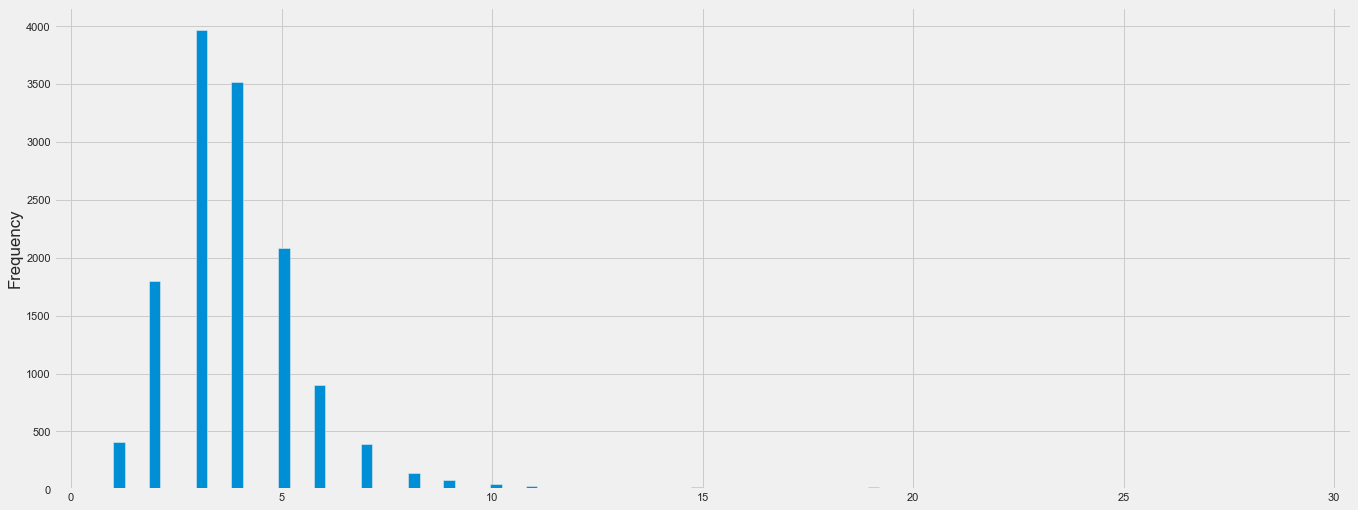

kamar_tidur


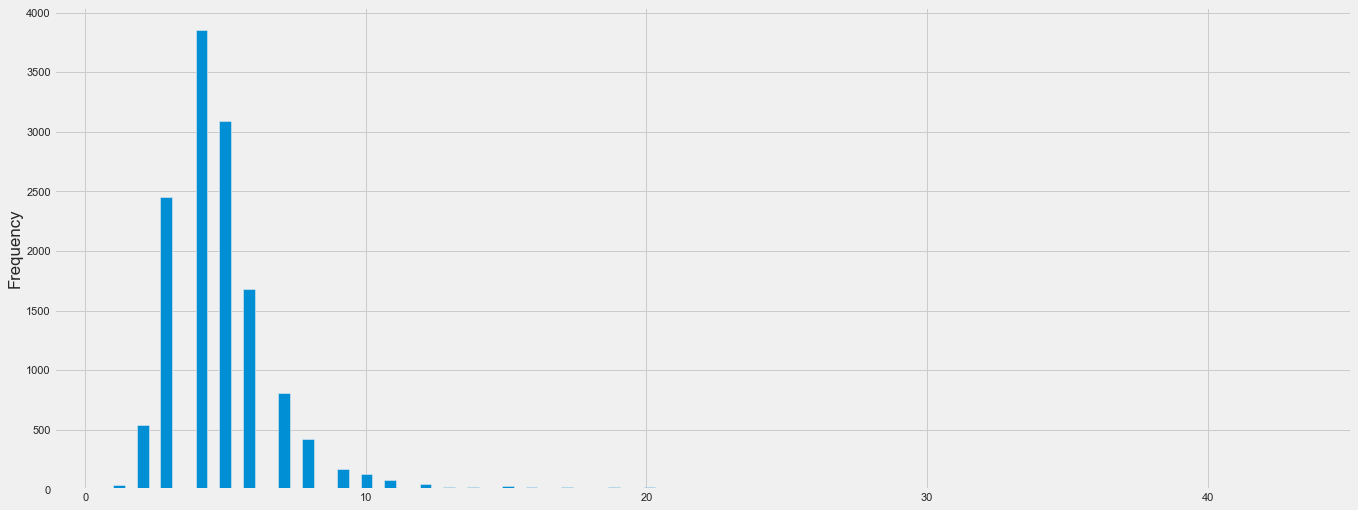

luas_bangunan


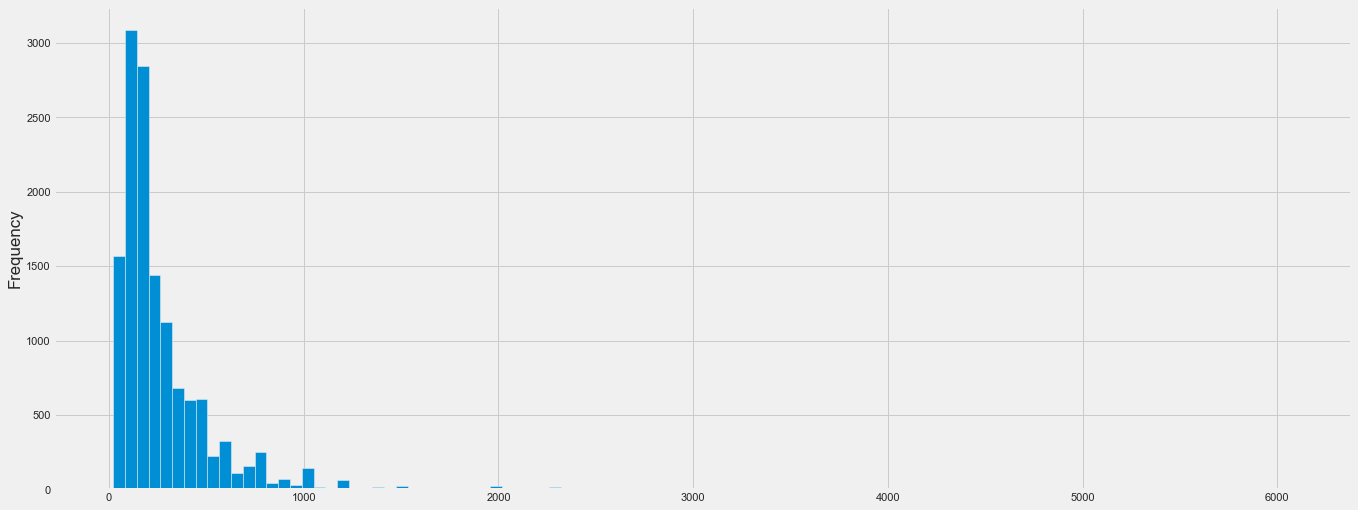

luas_tanah


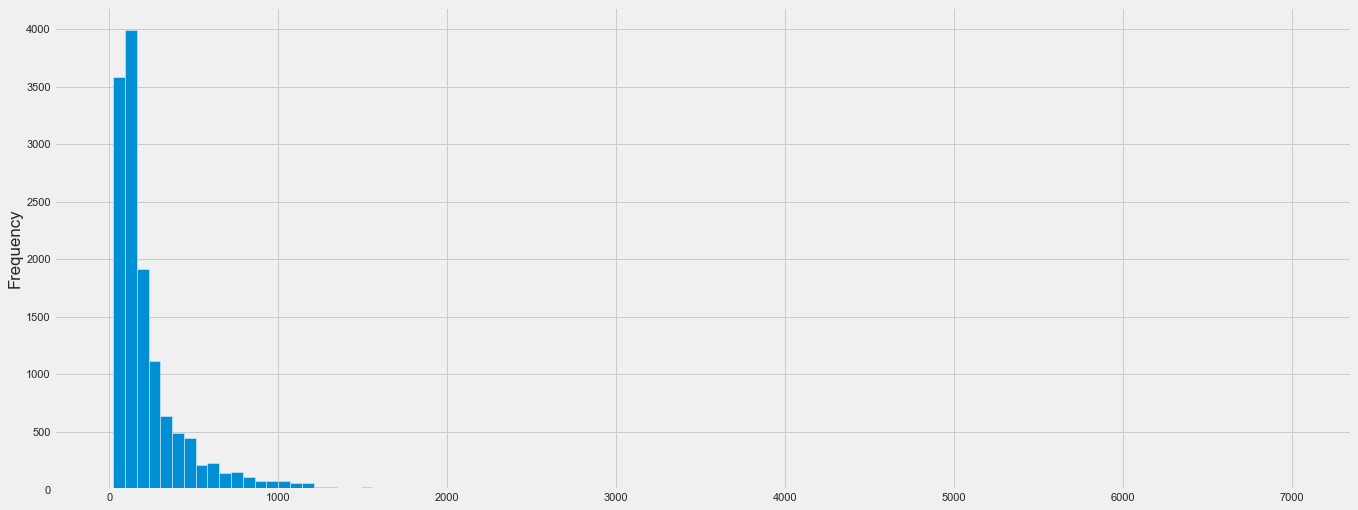

harga


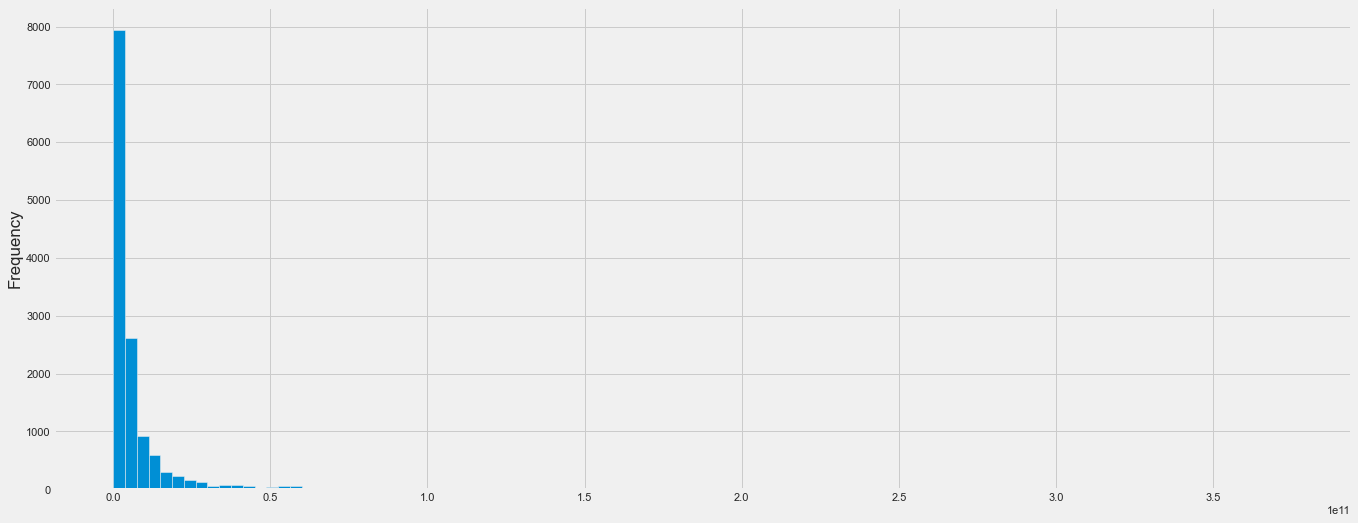

jumlah_lantai


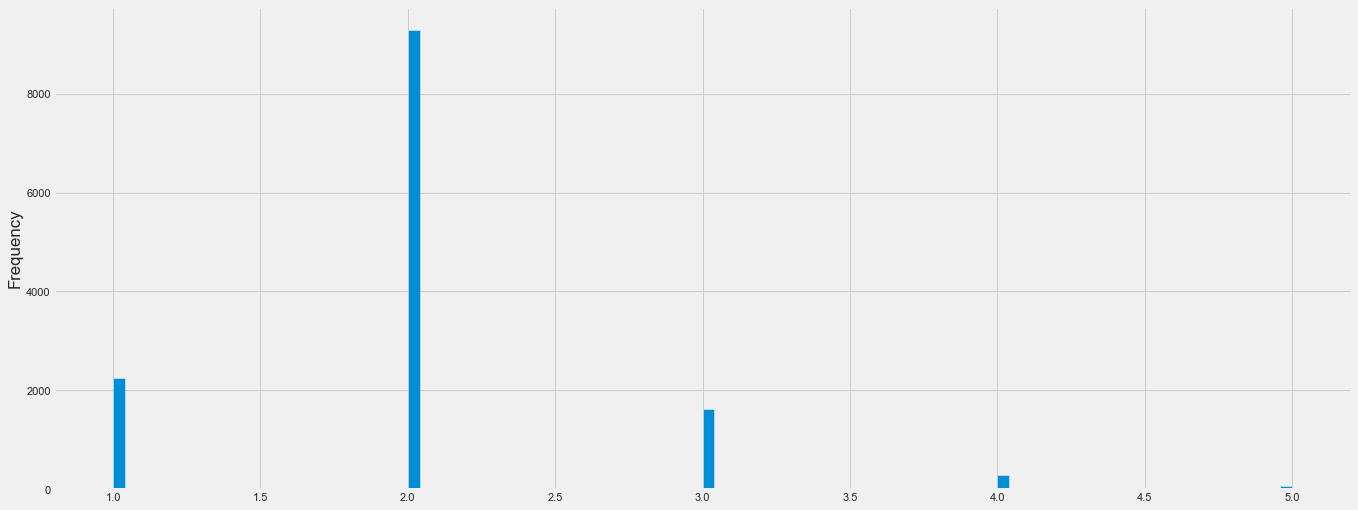

listrik


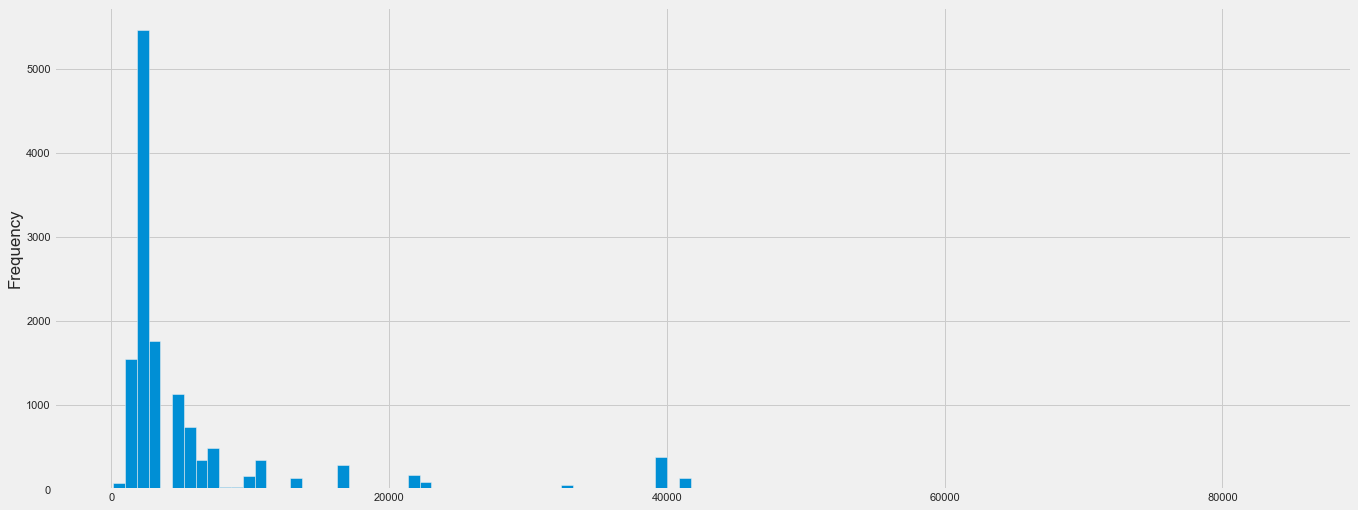

In [6]:
for i in num:
    print(i)
    df[i].plot.hist(bins=100)
    plt.show()
    

kamar_mandi


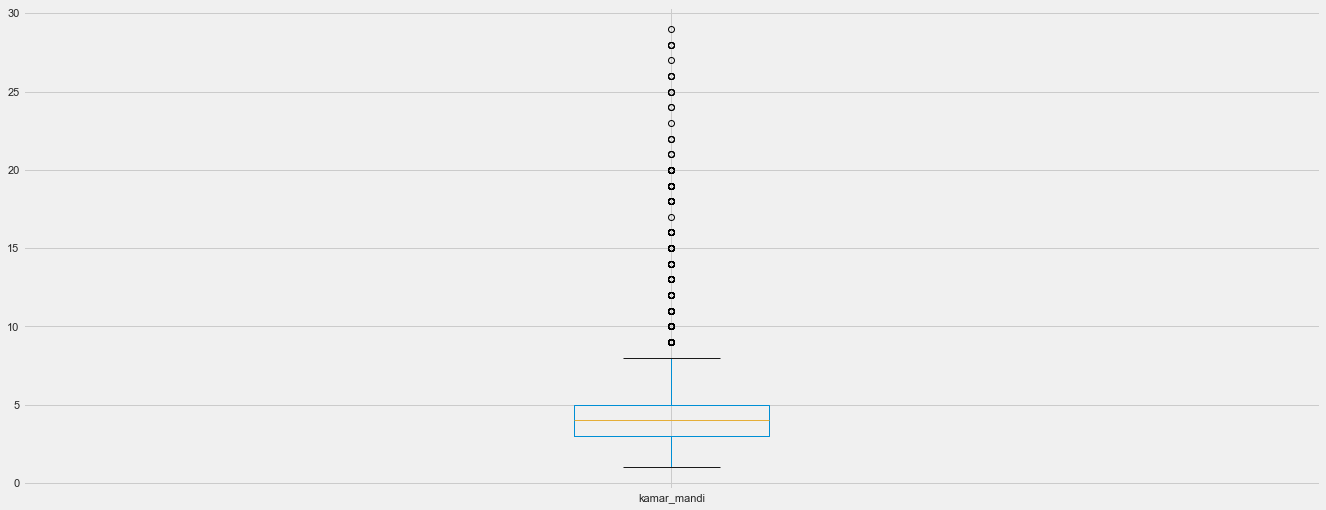

kamar_tidur


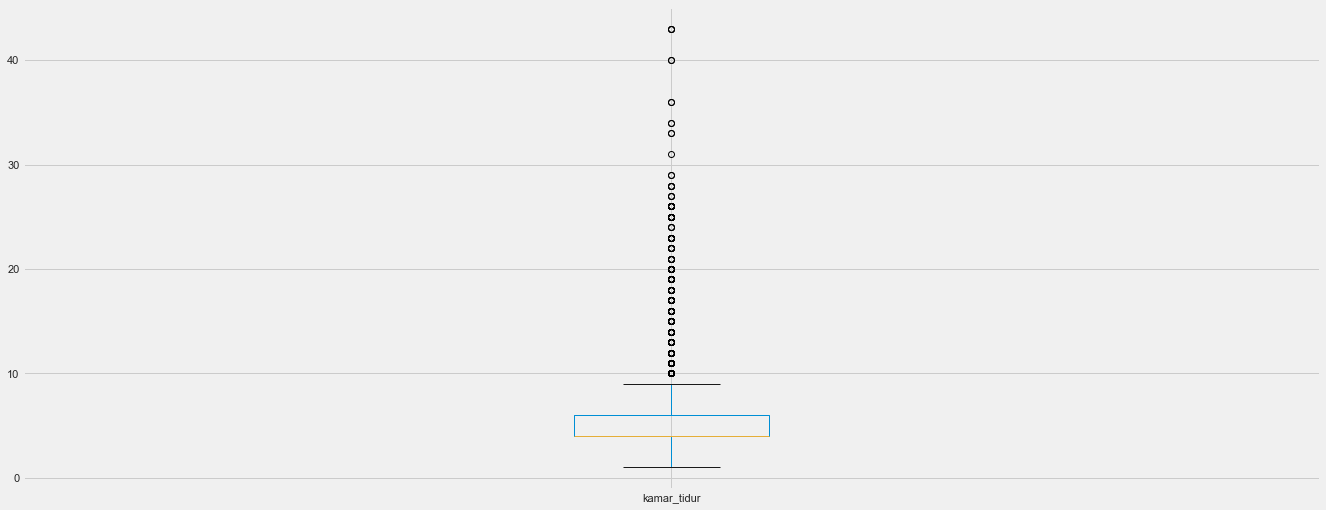

luas_bangunan


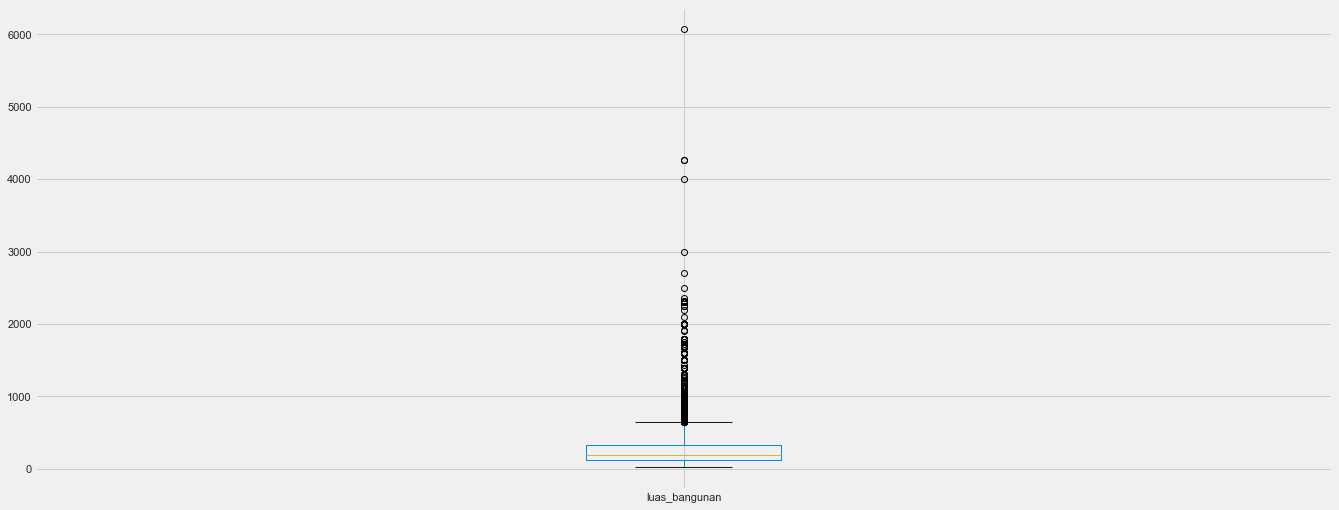

luas_tanah


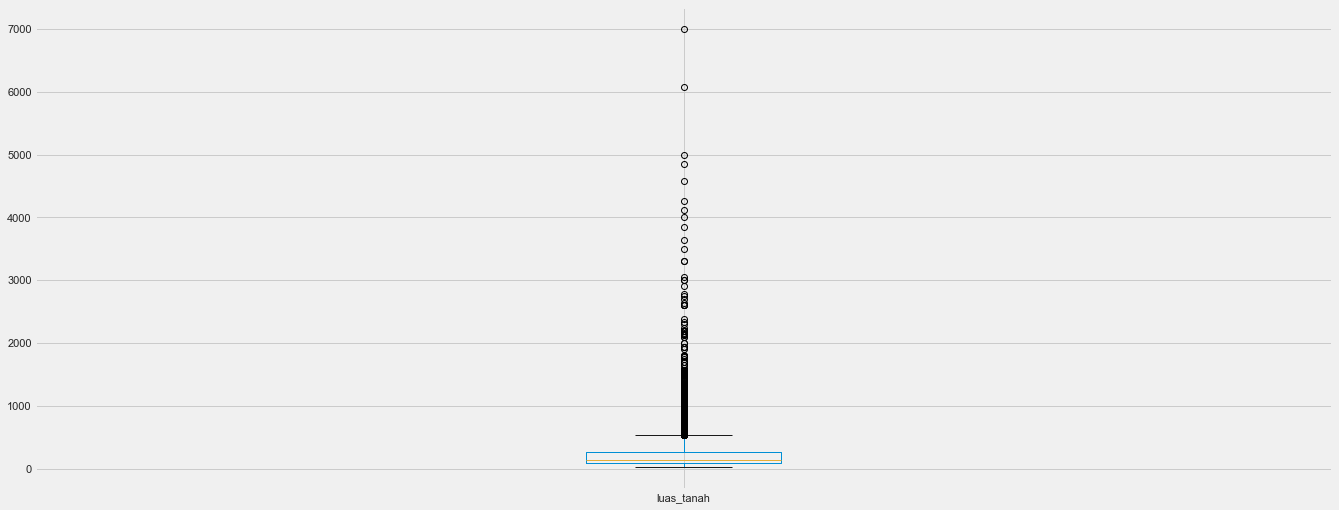

harga


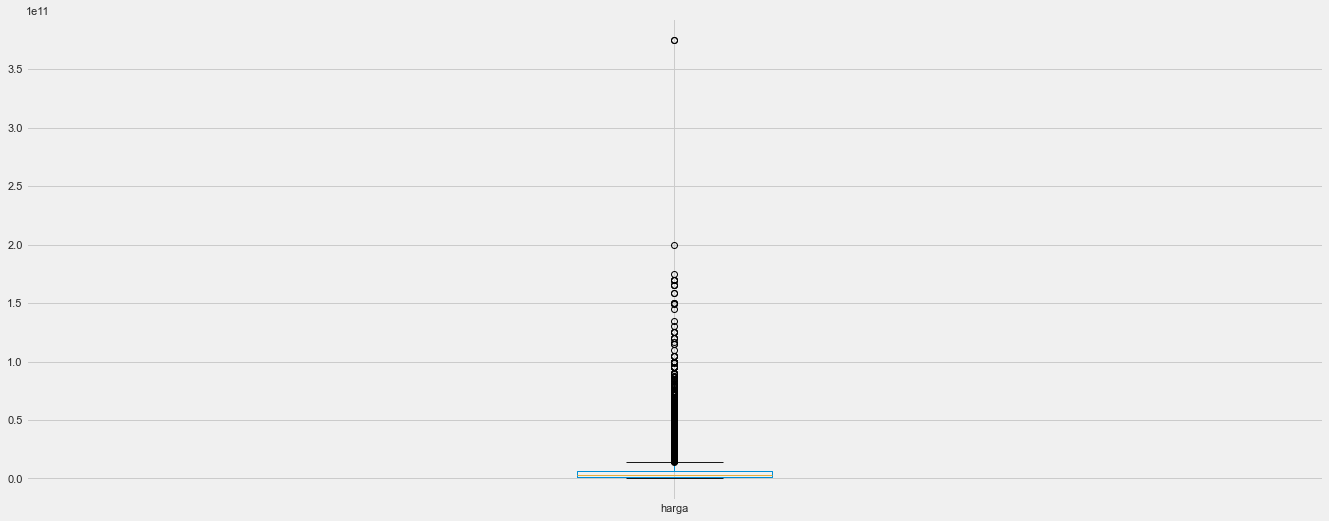

jumlah_lantai


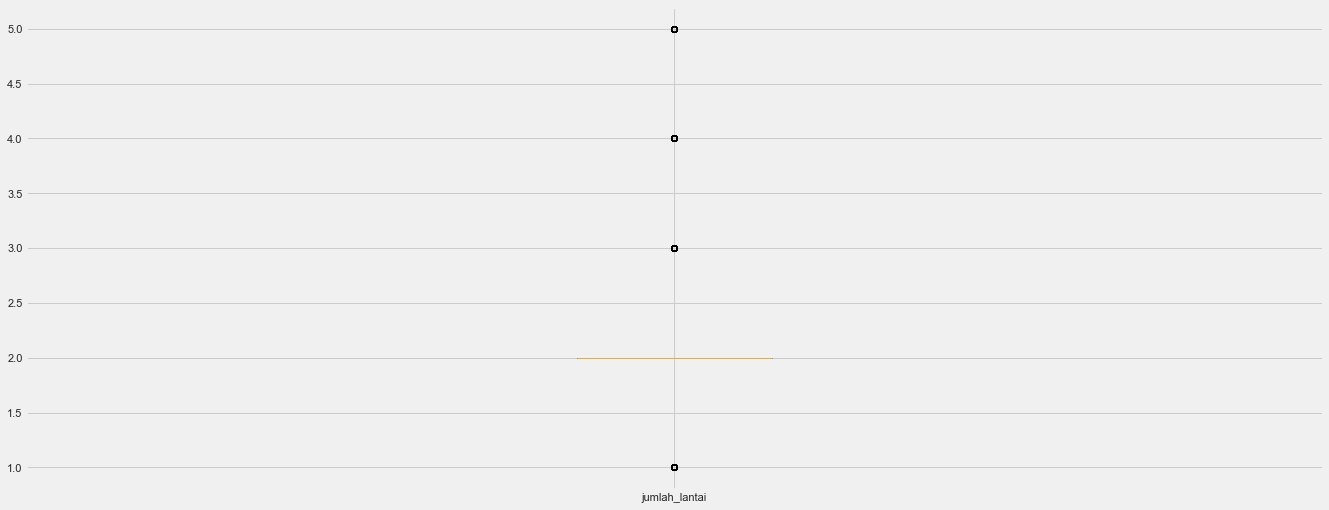

listrik


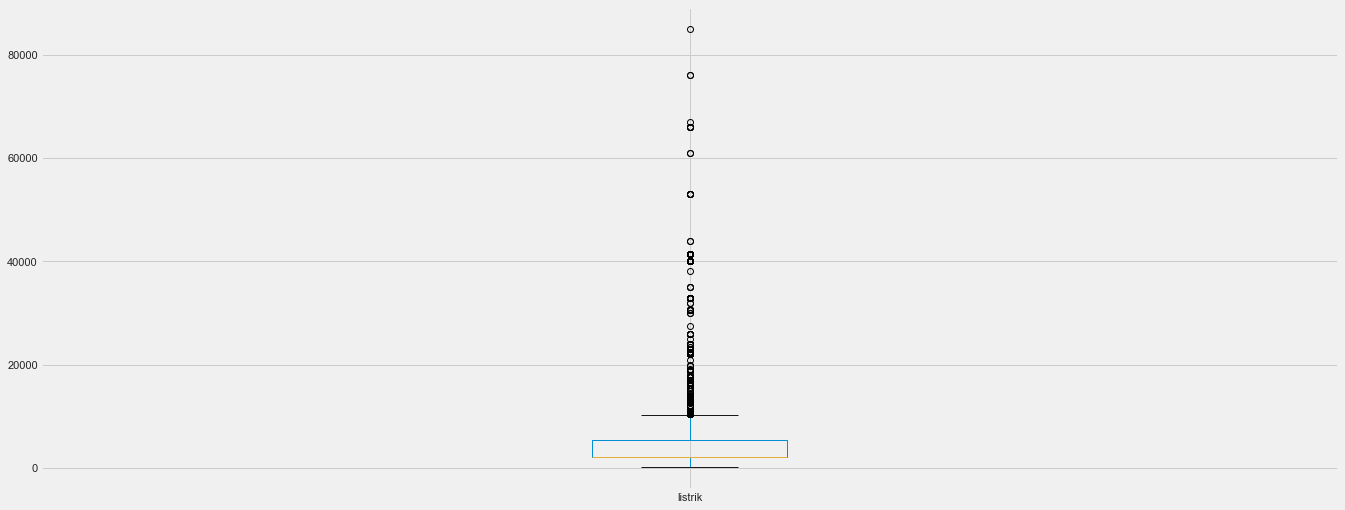

In [7]:
for i in num:
    print(i)
    df[i].plot.box()
    plt.show()
    

kecamatan


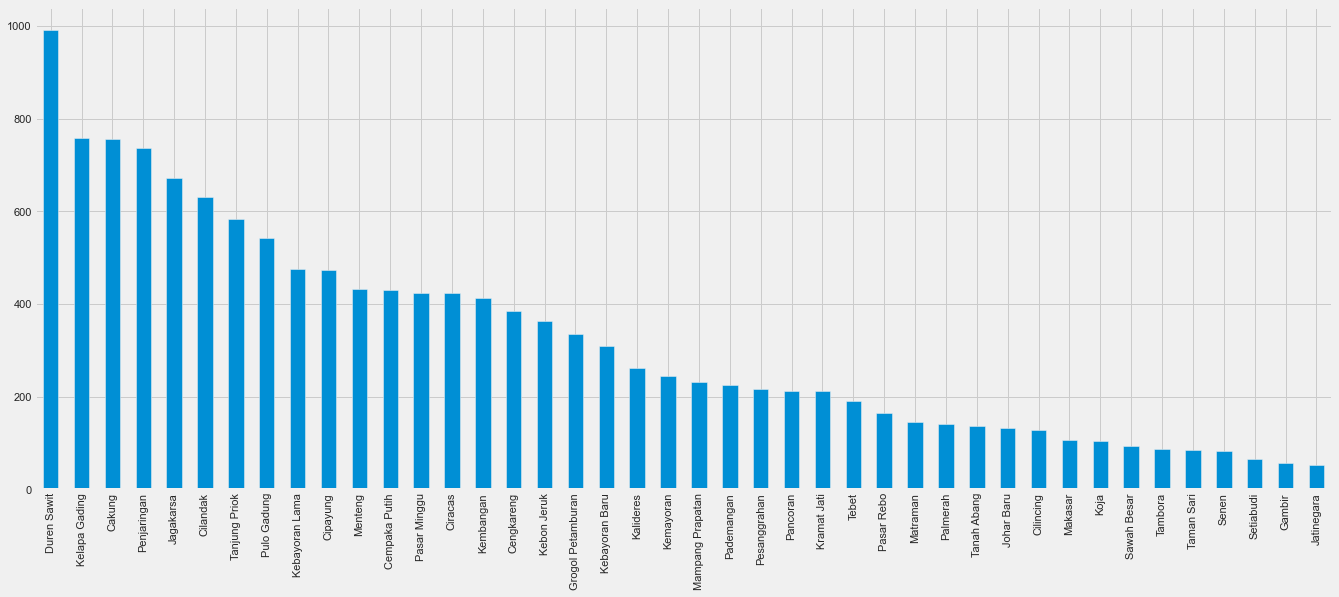

garasi


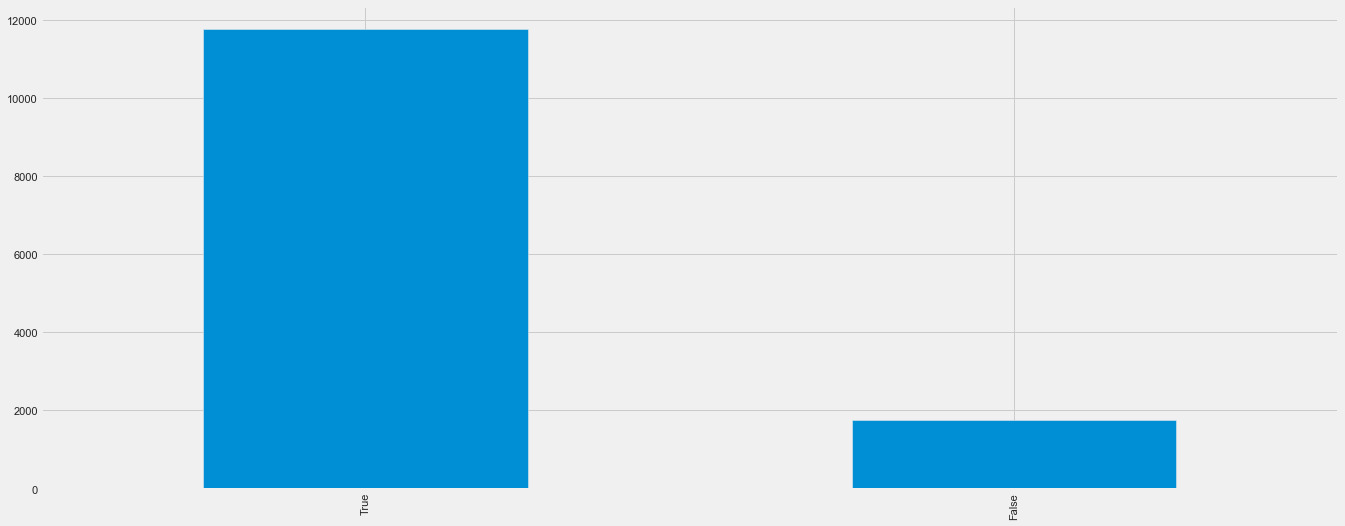

kolam_renang


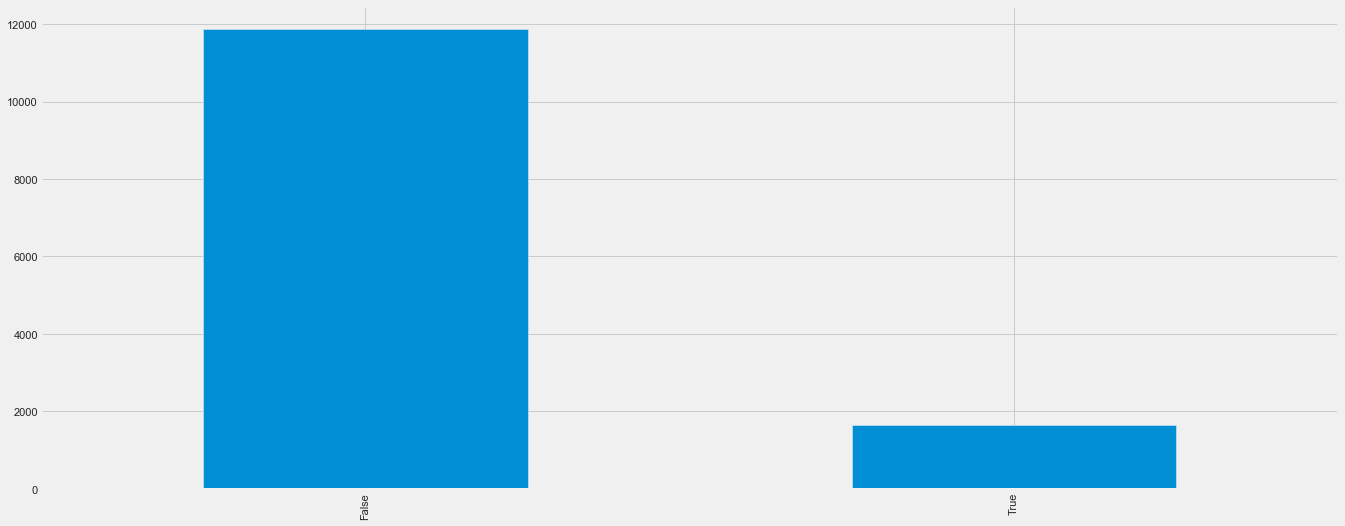

taman


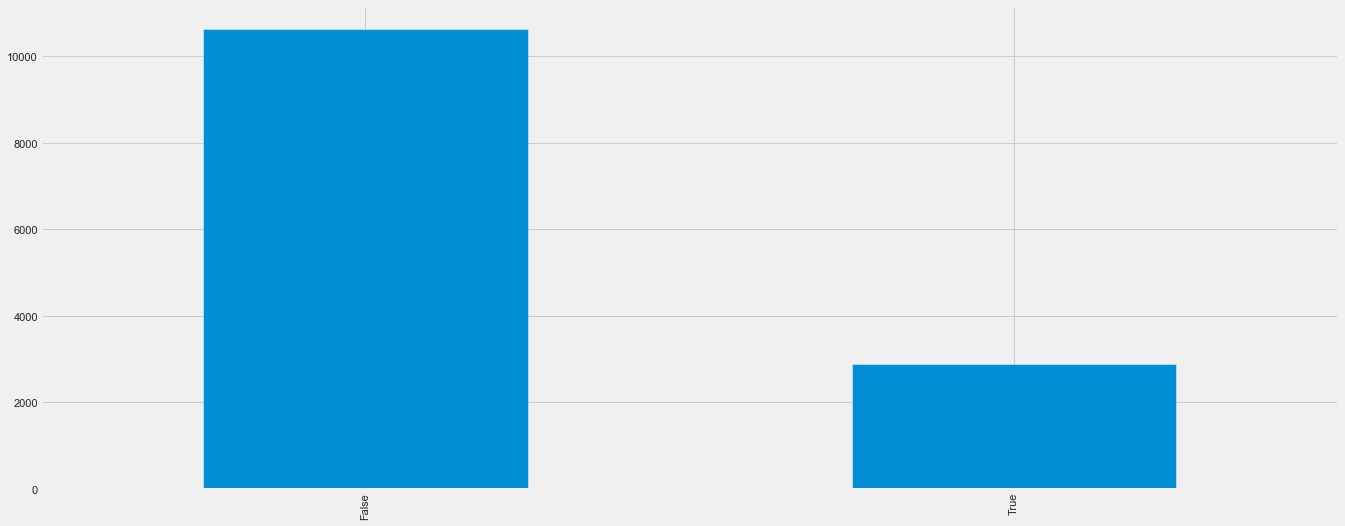

gym


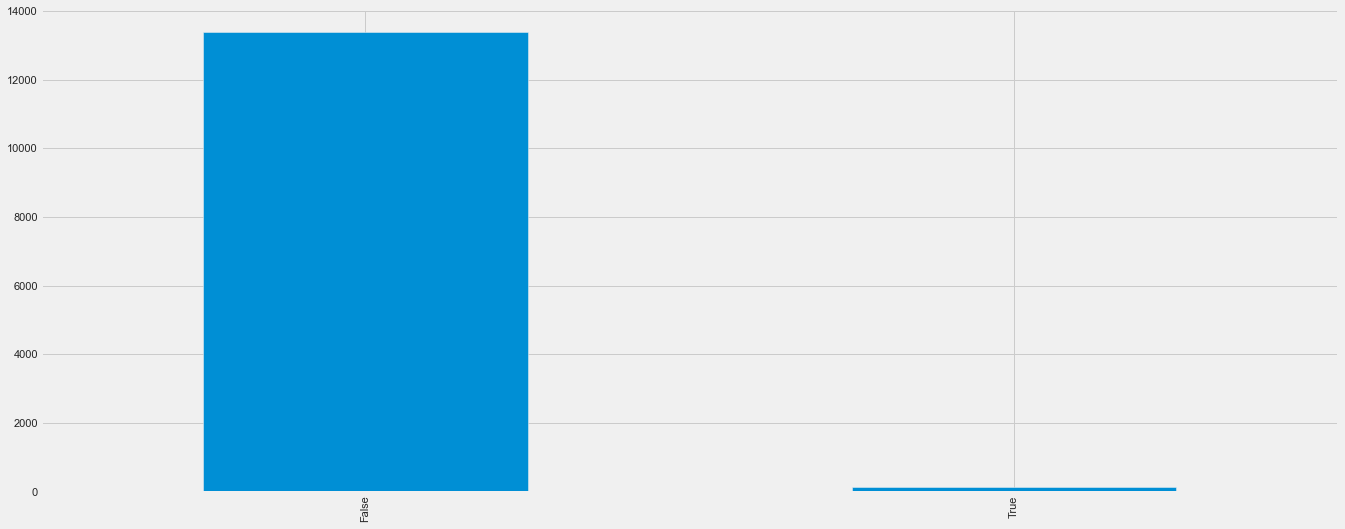

In [8]:
for i in cat:
    print(i)
    df[i].value_counts().plot.bar()
    plt.show()
    

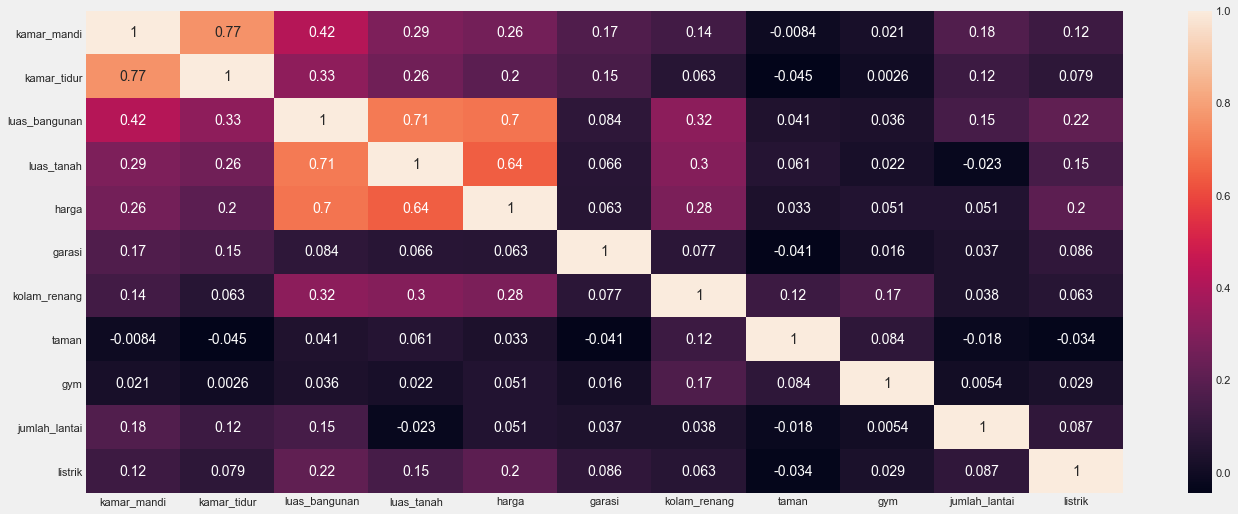

In [9]:
sns.heatmap(df.corr(), annot = True)
plt.show()

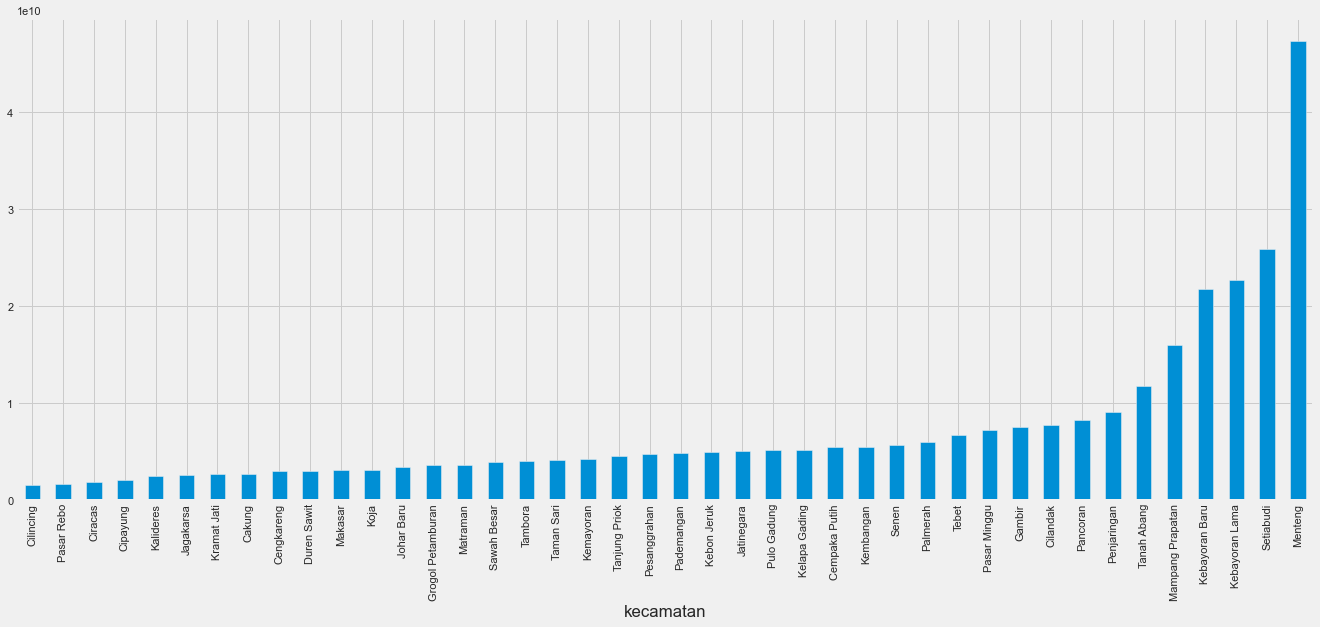

In [10]:
df.groupby('kecamatan')['harga'].mean().sort_values().plot.bar()
plt.show()

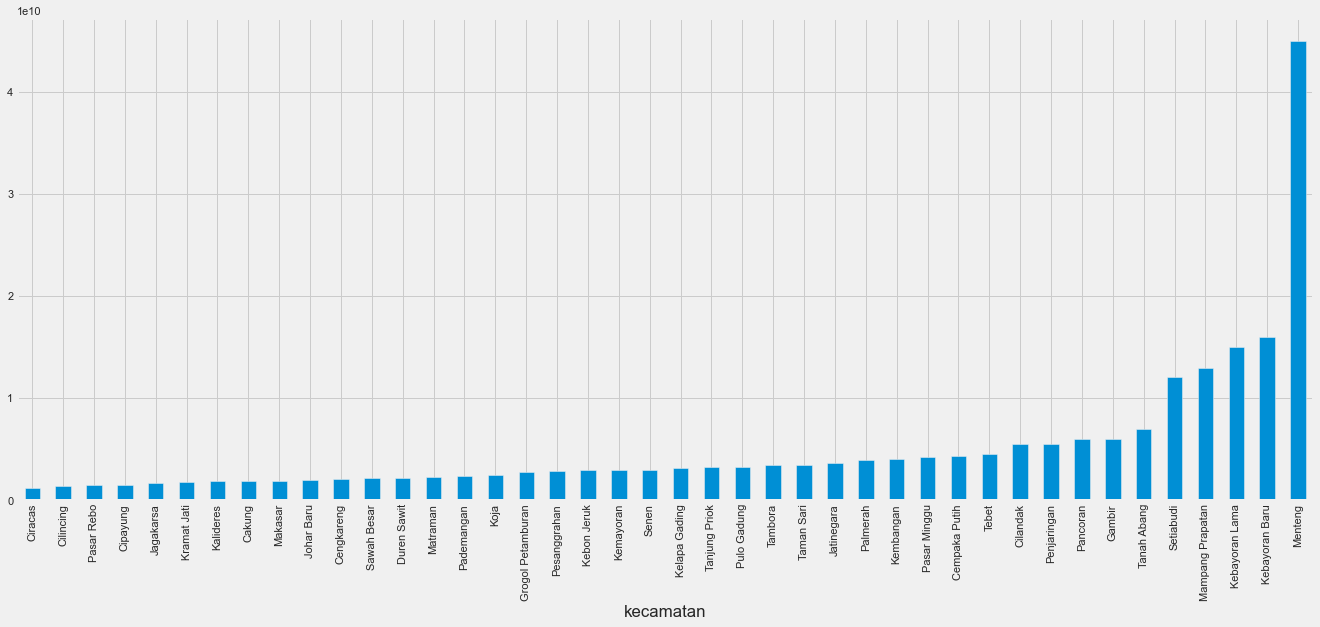

In [11]:
df.groupby('kecamatan')['harga'].median().sort_values().plot.bar()
plt.show()

In [12]:
from scipy import stats
lokasi = [i for i in df['kecamatan'].unique()]
pair = {}
udah = []
for i in lokasi:
    for j in lokasi:
        if (j not in udah) & (i != j):
            ttest = stats.ttest_ind(a = df[df['kecamatan'] == i]['harga'],
                                    b = df[df['kecamatan'] == j]['harga'])
            p_value = ttest.pvalue
            pair[f'{i} - {j}'] = p_value
    udah.append(i)

In [13]:
count = 0
for i,j in pair.items():
    if j >= 0.05:
        count += 1
print(count, len(pair))

170 861


In [14]:
for i,j in pair.items():
    if j >= 0.05:
        print(i)

Cilandak - Tebet
Cilandak - Pasar Minggu
Cilandak - Pancoran
Cilandak - Gambir
Kebayoran Baru - Kebayoran Lama
Kebayoran Baru - Setiabudi
Jagakarsa - Koja
Jagakarsa - Cakung
Jagakarsa - Kramat Jati
Jagakarsa - Makasar
Jagakarsa - Kalideres
Jagakarsa - Cengkareng
Tebet - Pasar Minggu
Tebet - Jatinegara
Tebet - Senen
Tebet - Gambir
Tebet - Palmerah
Pasar Minggu - Pancoran
Pasar Minggu - Jatinegara
Pasar Minggu - Senen
Pasar Minggu - Gambir
Pasar Minggu - Palmerah
Kebayoran Lama - Setiabudi
Pesanggrahan - Tanjung Priok
Pesanggrahan - Kelapa Gading
Pesanggrahan - Pademangan
Pesanggrahan - Pulo Gadung
Pesanggrahan - Matraman
Pesanggrahan - Jatinegara
Pesanggrahan - Senen
Pesanggrahan - Kemayoran
Pesanggrahan - Cempaka Putih
Pesanggrahan - Sawah Besar
Pesanggrahan - Johar Baru
Pesanggrahan - Palmerah
Pesanggrahan - Kembangan
Pesanggrahan - Kebon Jeruk
Pesanggrahan - Taman Sari
Pesanggrahan - Tambora
Pancoran - Penjaringan
Pancoran - Gambir
Tanjung Priok - Pademangan
Tanjung Priok - Matraman


### KMeans Clustering

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    13514 non-null  int64  
 1   kamar_tidur    13514 non-null  int64  
 2   luas_bangunan  13514 non-null  float64
 3   luas_tanah     13514 non-null  float64
 4   harga          13514 non-null  float64
 5   kecamatan      13514 non-null  object 
 6   garasi         13514 non-null  bool   
 7   kolam_renang   13514 non-null  bool   
 8   taman          13514 non-null  bool   
 9   gym            13514 non-null  bool   
 10  jumlah_lantai  13514 non-null  int64  
 11  listrik        13514 non-null  float64
dtypes: bool(4), float64(4), int64(3), object(1)
memory usage: 897.5+ KB


In [16]:
from feature_engine.encoding import DecisionTreeEncoder as dte

In [17]:
X = df.copy()
encoding = dte(encoding_method='ordered', regression=True)
encoding.fit(X=X[['kecamatan']], y=X['harga'])

DecisionTreeEncoder(encoding_method='ordered',
                    param_grid={'max_depth': [1, 2, 3, 4]},
                    variables=['kecamatan'])

In [18]:
X['kecamatan'] = encoding.transform(X[['kecamatan']])

In [19]:
X.head()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,kecamatan,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik
0,5,6,353.0,155.0,6.700000e+09,8.969775e+09,True,True,False,False,2,6600.0
1,4,4,90.0,60.0,1.299000e+09,8.969775e+09,True,False,False,False,2,2200.0
2,4,6,160.0,109.0,2.300000e+09,2.264125e+10,True,False,False,False,2,3500.0
3,3,4,125.0,72.0,3.149480e+09,8.969775e+09,True,False,True,False,2,2200.0
4,3,4,90.0,87.0,1.210000e+09,3.748208e+09,True,True,False,False,2,2200.0


In [20]:
#### KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [21]:
ssd = []
for k in range(2,20):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
ssd

[133107.28451010466,
 119908.62738717435,
 110029.43713100847,
 100867.94578486003,
 87713.62095324614,
 79065.49203463072,
 70679.67498572983,
 65701.03897398317,
 61541.331487191,
 57821.07544227403,
 55129.25247487402,
 53200.31627886208,
 51319.72131230795,
 49944.81380795269,
 47559.51448984929,
 46619.72098337351,
 45113.355970241624,
 44066.31451451879]

Text(0, 0.5, ' Sum of Squared Distances')

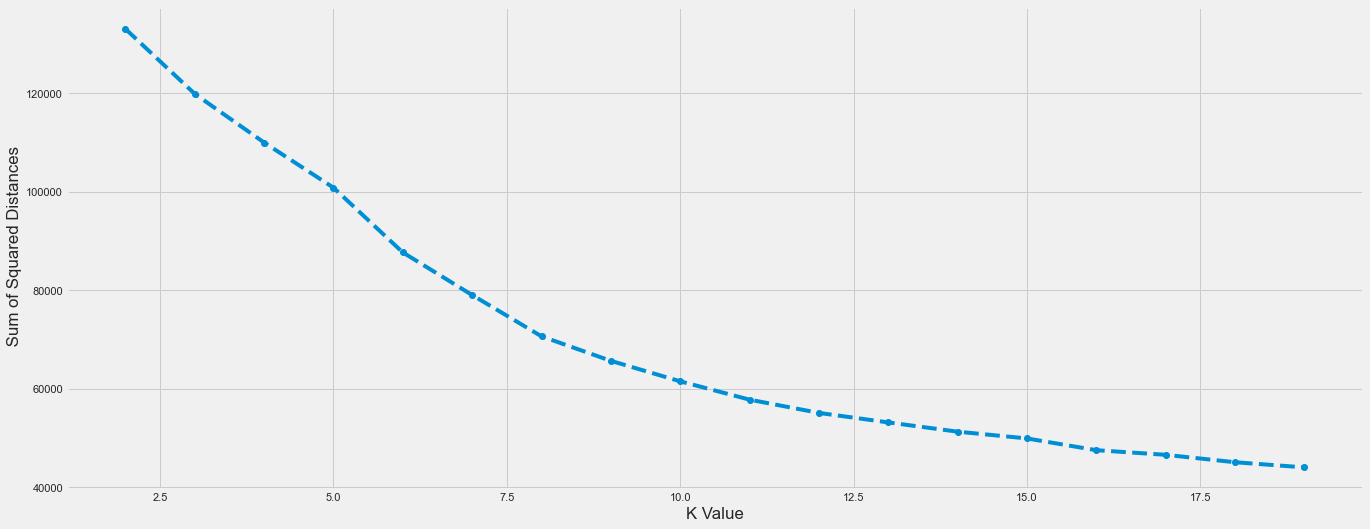

In [22]:
plt.plot(range(2,20),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [23]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0              NaN
1    -13198.657123
2     -9879.190256
3     -9161.491346
4    -13154.324832
5     -8648.128919
6     -8385.817049
7     -4978.636012
8     -4159.707487
9     -3720.256045
10    -2691.822967
11    -1928.936196
12    -1880.594967
13    -1374.907504
14    -2385.299318
15     -939.793506
16    -1506.365013
17    -1047.041456
dtype: float64

In [24]:
model = KMeans(n_clusters=3, random_state=42)
clusters_labels = model.fit_predict(scaled_X)

In [25]:
df_3c = df.copy()
df_3c['Clusters'] = clusters_labels

In [26]:
df_3c

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,kecamatan,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik,Clusters
0,5,6,353.0,155.0,6.700000e+09,Mampang Prapatan,True,True,False,False,2,6600.0,2
1,4,4,90.0,60.0,1.299000e+09,Cilandak,True,False,False,False,2,2200.0,2
2,4,6,160.0,109.0,2.300000e+09,Kebayoran Baru,True,False,False,False,2,3500.0,2
3,3,4,125.0,72.0,3.149480e+09,Mampang Prapatan,True,False,True,False,2,2200.0,2
4,3,4,90.0,87.0,1.210000e+09,Jagakarsa,True,True,False,False,2,2200.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,5,5,350.0,250.0,3.800000e+09,Koja,True,False,False,False,2,2200.0,2
13510,5,5,250.0,320.0,8.800000e+09,Koja,True,False,False,False,1,2200.0,2
13511,6,6,250.0,173.0,2.950000e+09,Koja,True,False,False,False,1,2200.0,2
13512,5,5,97.0,75.0,1.750000e+09,Koja,True,False,False,False,1,2200.0,2


In [27]:
df_3c[df_3c['Clusters'] == 0][num].describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,jumlah_lantai,listrik
count,1880.000000,1880.000000,1880.000000,1880.000000,1.880000e+03,1880.00000,1880.000000
mean,6.425532,7.586170,713.134043,692.412766,2.963312e+10,2.11117,9586.228191
std,3.695399,4.873386,419.421545,515.174120,2.757201e+10,0.71021,10570.476120
min,1.000000,1.000000,50.000000,48.000000,1.050000e+09,1.00000,130.000000
25%,4.000000,5.000000,460.000000,405.750000,1.300000e+10,2.00000,2200.000000
50%,6.000000,6.000000,600.000000,586.000000,2.100000e+10,2.00000,5500.000000
75%,7.000000,8.000000,825.000000,844.000000,3.800000e+10,2.00000,13000.000000
max,29.000000,43.000000,6075.000000,7000.000000,3.750000e+11,5.00000,76000.000000


In [28]:
df_3c[df_3c['Clusters'] == 0][cat].describe()

,kecamatan,garasi,kolam_renang,taman,gym
count,1880,1880,1880,1880,1880
unique,41,2,2,2,2
top,Menteng,True,False,False,False
freq,372,1796,984,1371,1838


In [29]:
df_3c[df_3c['Clusters'] == 1][num].describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,jumlah_lantai,listrik
count,1670.000000,1670.000000,1670.000000,1670.000000,1.670000e+03,1670.000000,1670.000000
mean,2.786826,3.580838,185.605389,157.470659,3.575296e+09,1.934132,3370.317365
std,1.180049,1.442027,139.339865,137.968962,4.161887e+09,0.615729,3250.355701
min,1.000000,1.000000,21.000000,22.000000,5.500000e+07,1.000000,220.000000
25%,2.000000,3.000000,100.000000,84.000000,1.500000e+09,2.000000,2200.000000
50%,3.000000,3.000000,150.000000,120.000000,2.295000e+09,2.000000,2200.000000
75%,3.000000,4.000000,230.000000,192.000000,4.100000e+09,2.000000,4400.000000
max,11.000000,20.000000,1200.000000,2200.000000,5.800000e+10,5.000000,85000.000000


In [30]:
df_3c[df_3c['Clusters'] ==1][cat].describe()

,kecamatan,garasi,kolam_renang,taman,gym
count,1670,1670,1670,1670,1670
unique,41,1,2,2,2
top,Ciracas,False,False,False,False
freq,156,1670,1593,1238,1661


In [31]:
df_3c[df_3c['Clusters'] == 2][num].describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,jumlah_lantai,listrik
count,9964.000000,9964.000000,9964.000000,9964.000000,9.964000e+03,9964.000000,9964.000000
mean,3.703733,4.678844,203.409976,167.043155,3.768049e+09,2.004918,5554.102369
std,1.288988,1.657406,128.282566,123.842872,3.410413e+09,0.630991,8422.879434
min,1.000000,1.000000,21.000000,22.000000,1.300000e+08,1.000000,130.000000
25%,3.000000,4.000000,110.000000,90.000000,1.503038e+09,2.000000,2200.000000
50%,4.000000,4.000000,170.000000,128.000000,2.650000e+09,2.000000,2200.000000
75%,4.000000,5.000000,260.000000,205.000000,4.800000e+09,2.000000,4400.000000
max,14.000000,22.000000,1050.000000,1800.000000,3.300000e+10,5.000000,41500.000000


In [32]:
df_3c[df_3c['Clusters'] == 2][cat].describe()

,kecamatan,garasi,kolam_renang,taman,gym
count,9964,9964,9964,9964,9964
unique,42,1,2,2,2
top,Duren Sawit,True,False,False,False
freq,874,9964,9292,8015,9885


In [33]:
df_3c['Clusters'].value_counts()

2    9964
0    1880
1    1670
Name: Clusters, dtype: int64

In [34]:
df_3c.corr()['Clusters'][:-1].sort_values()

luas_bangunan   -0.586013
harga           -0.567955
luas_tanah      -0.556929
kolam_renang    -0.379644
kamar_mandi     -0.357380
kamar_tidur     -0.300182
listrik         -0.120367
taman           -0.072371
gym             -0.042916
jumlah_lantai   -0.039756
garasi           0.346489
Name: Clusters, dtype: float64

<AxesSubplot:>

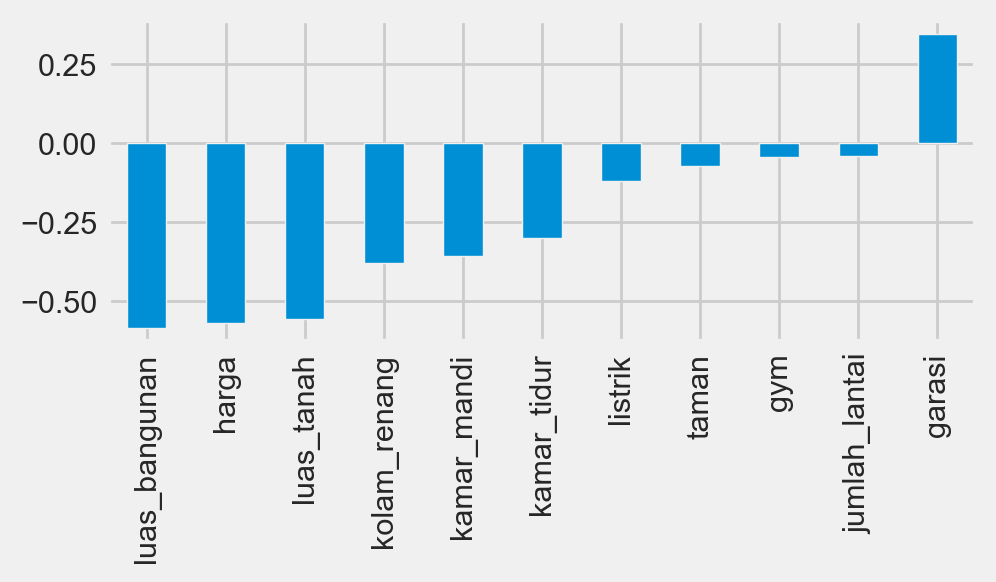

In [35]:
plt.figure(figsize=(5,2), dpi=200)
df_3c.corr()['Clusters'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='luas_bangunan', ylabel='harga'>

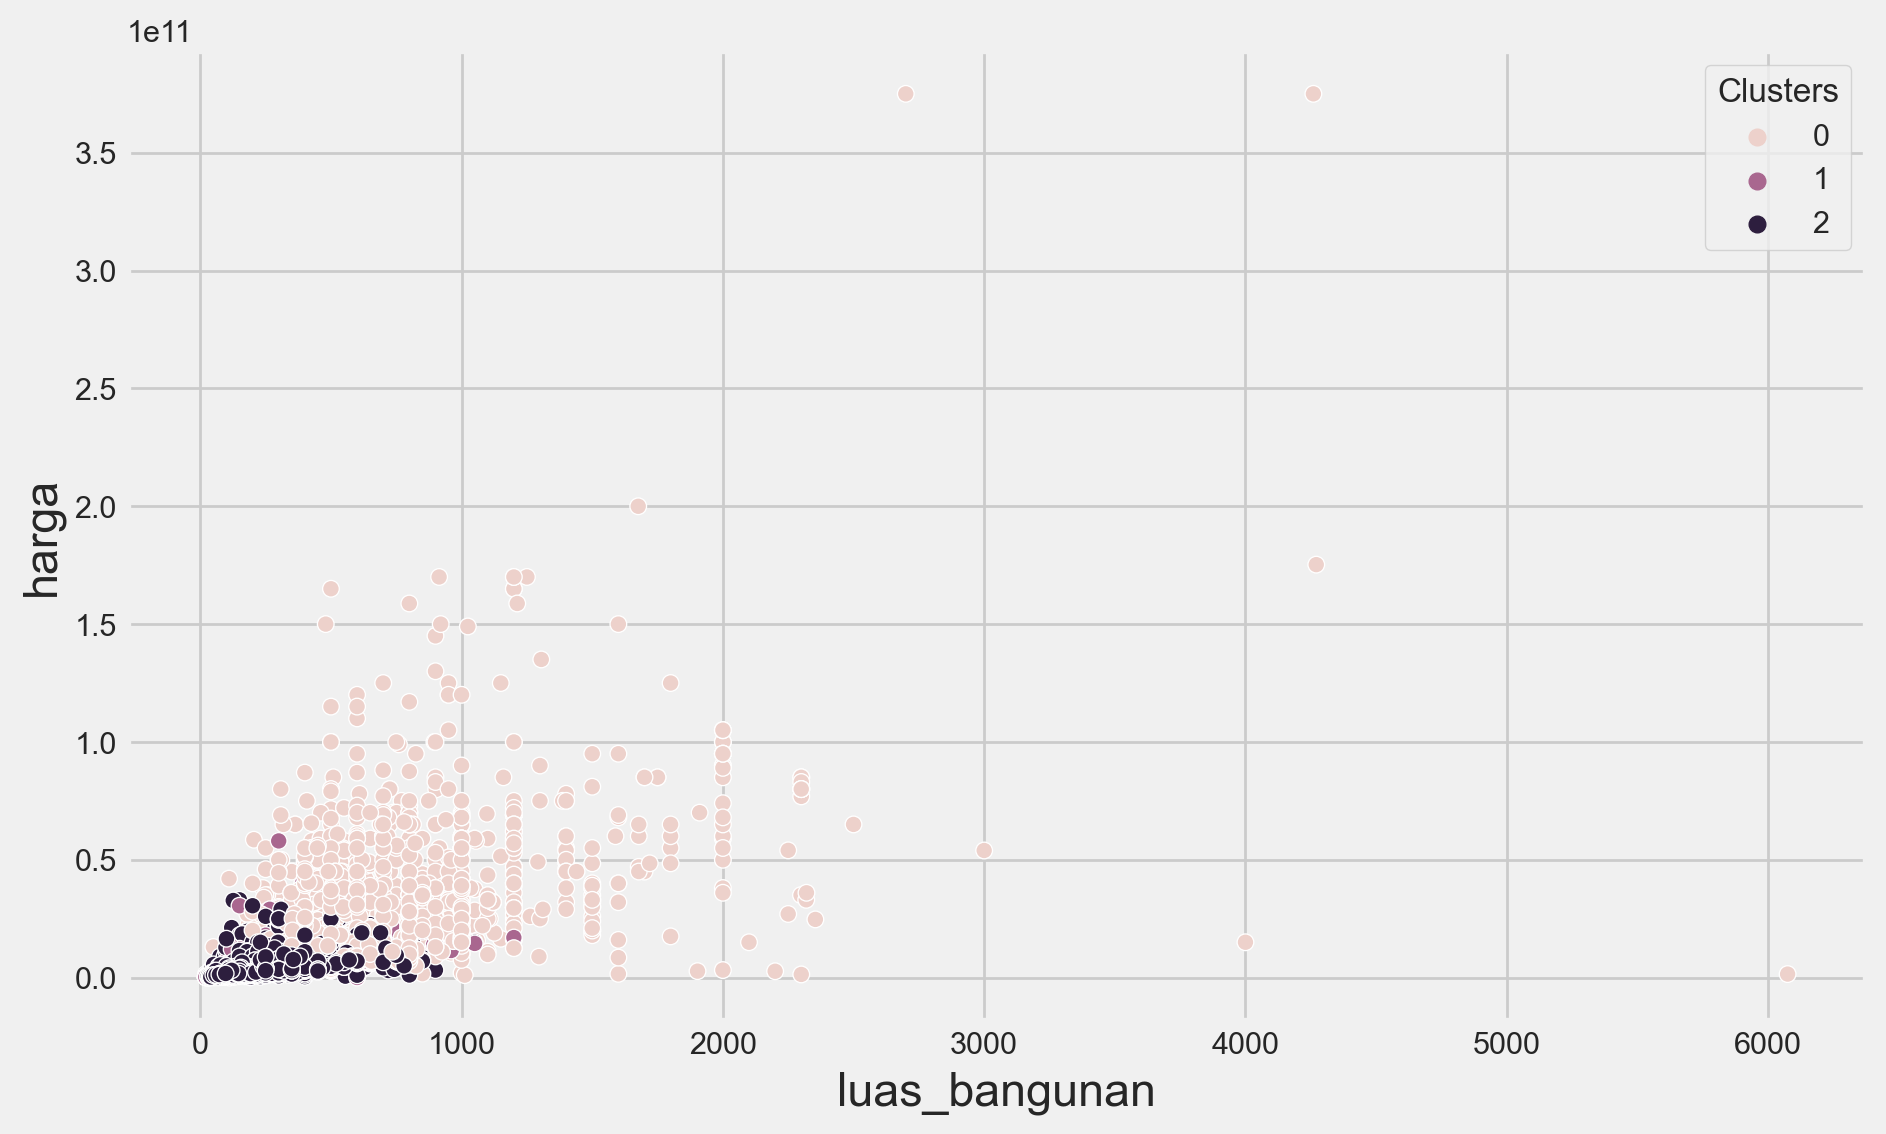

In [36]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df_3c,x='luas_bangunan',y='harga',hue=df_3c['Clusters'])

<AxesSubplot:xlabel='luas_tanah', ylabel='harga'>

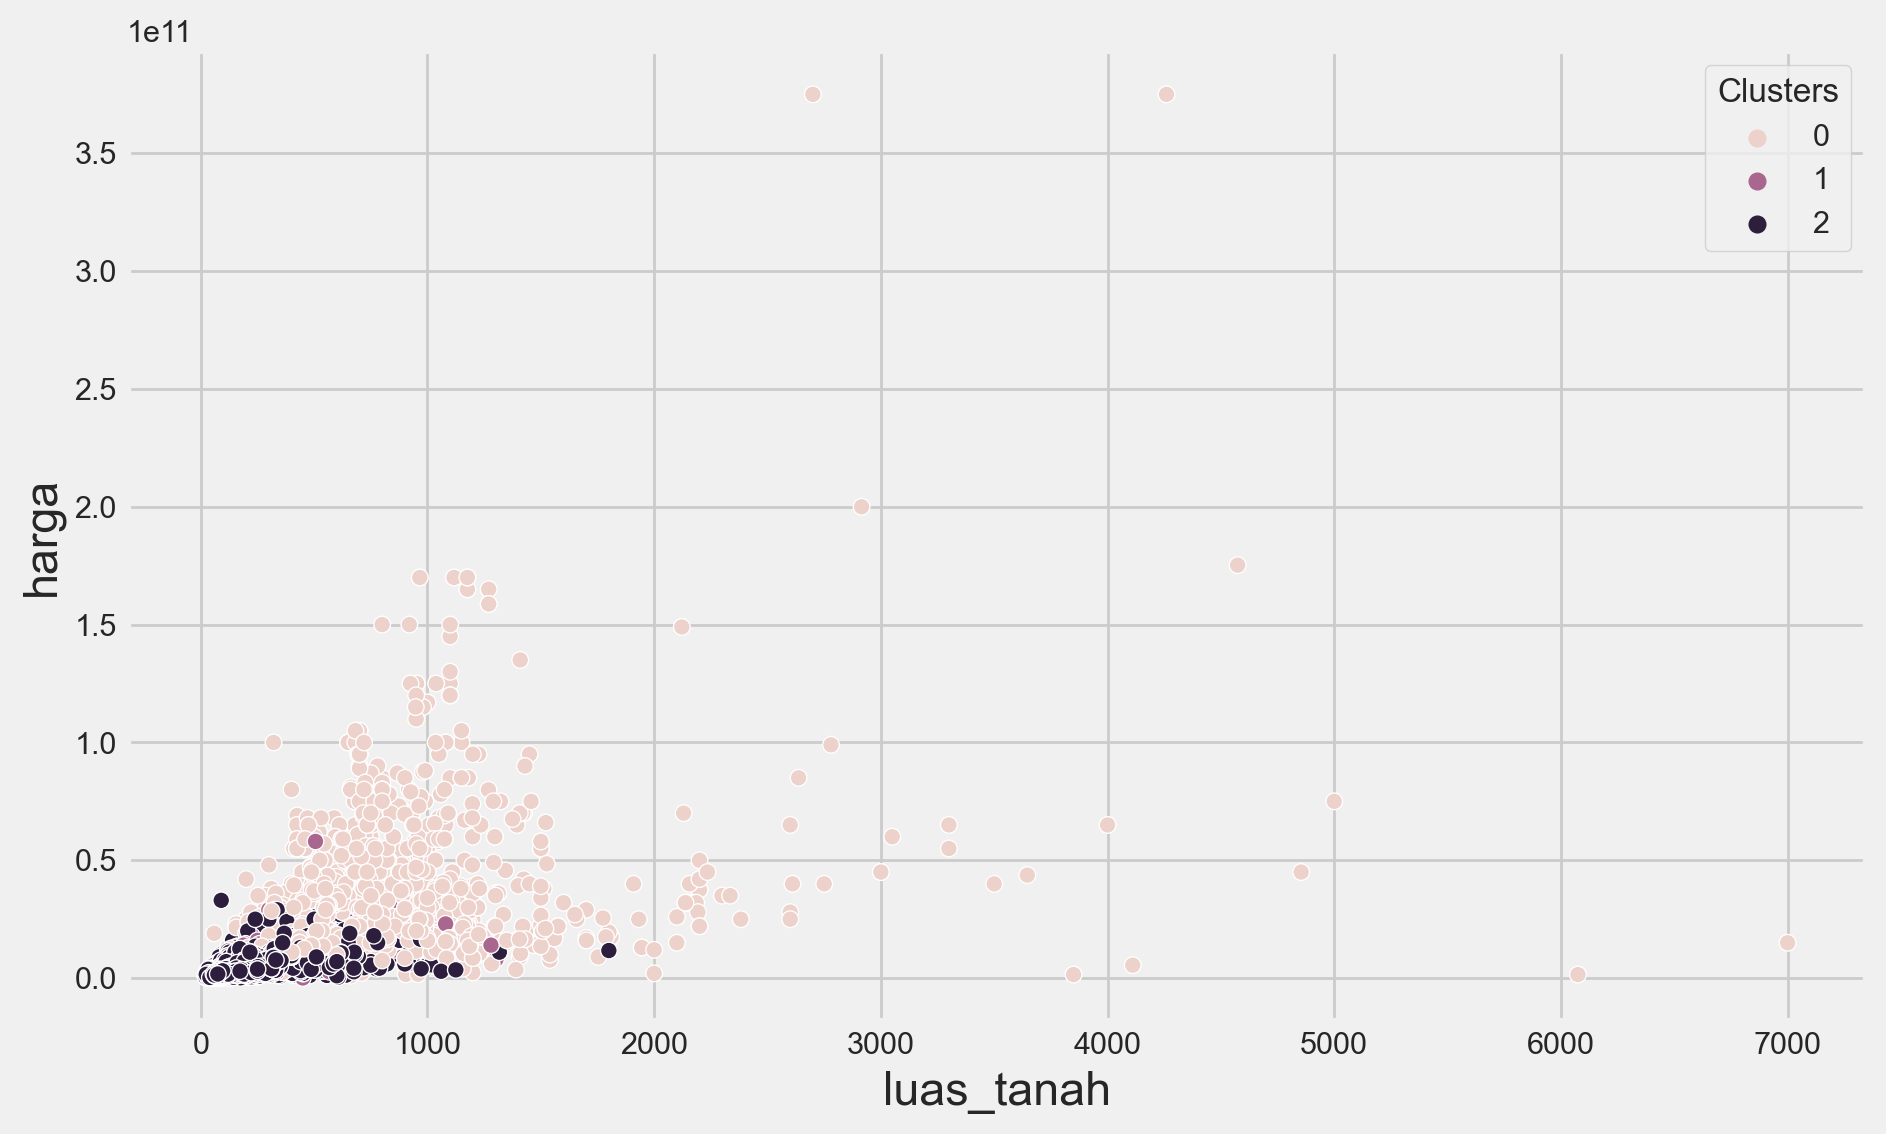

In [37]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df_3c,x='luas_tanah',y='harga',hue=df_3c['Clusters'])

<AxesSubplot:xlabel='garasi', ylabel='harga'>

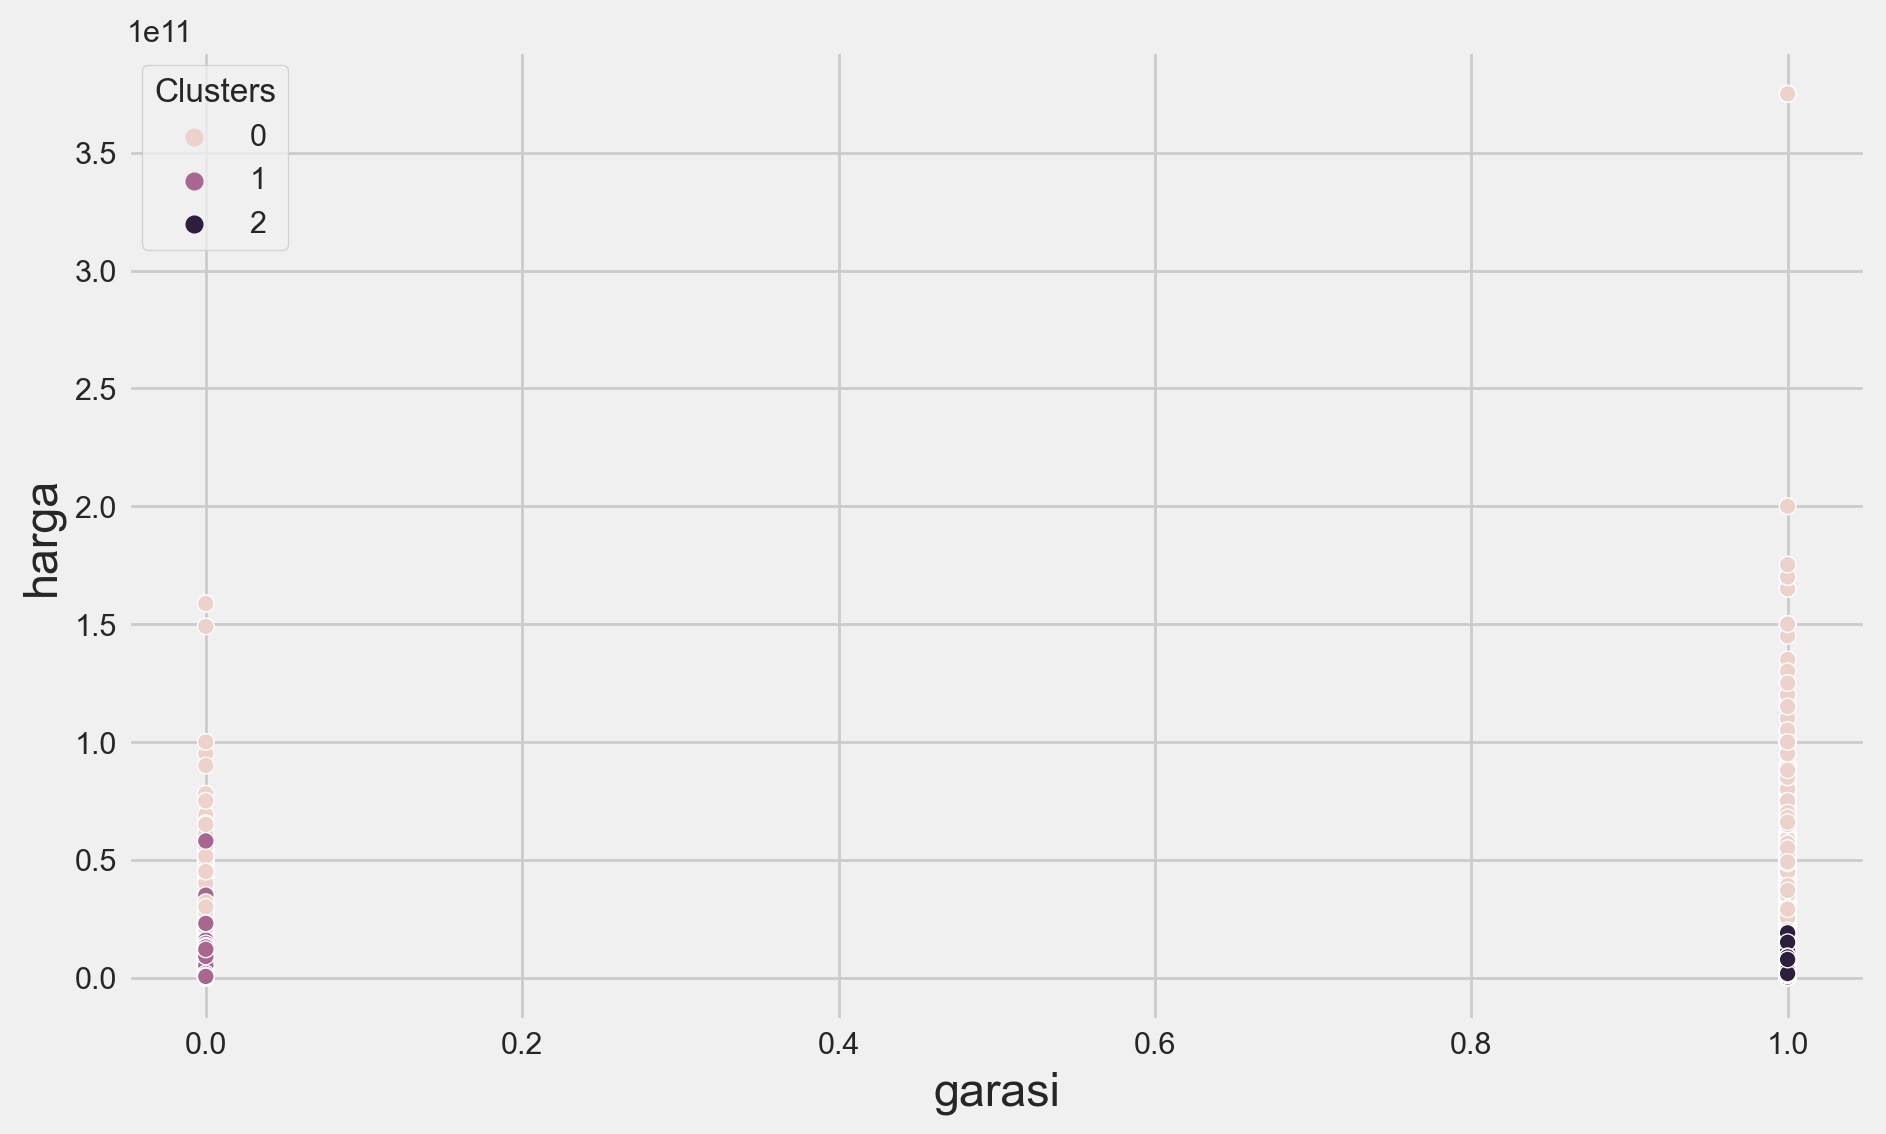

In [38]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df_3c,x='garasi',y='harga',hue=df_3c['Clusters'])

#### $k=2$

In [39]:
model = KMeans(n_clusters=2, random_state=42)
clusters_labels = model.fit_predict(scaled_X) 

In [40]:
df_2c = df.copy()
df_2c['Clusters'] = clusters_labels

In [41]:
df_2c

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,kecamatan,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik,Clusters
0,5,6,353.0,155.0,6.700000e+09,Mampang Prapatan,True,True,False,False,2,6600.0,1
1,4,4,90.0,60.0,1.299000e+09,Cilandak,True,False,False,False,2,2200.0,1
2,4,6,160.0,109.0,2.300000e+09,Kebayoran Baru,True,False,False,False,2,3500.0,1
3,3,4,125.0,72.0,3.149480e+09,Mampang Prapatan,True,False,True,False,2,2200.0,1
4,3,4,90.0,87.0,1.210000e+09,Jagakarsa,True,True,False,False,2,2200.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,5,5,350.0,250.0,3.800000e+09,Koja,True,False,False,False,2,2200.0,1
13510,5,5,250.0,320.0,8.800000e+09,Koja,True,False,False,False,1,2200.0,1
13511,6,6,250.0,173.0,2.950000e+09,Koja,True,False,False,False,1,2200.0,1
13512,5,5,97.0,75.0,1.750000e+09,Koja,True,False,False,False,1,2200.0,1


In [42]:
df_2c['Clusters'].value_counts()

1    11442
0     2072
Name: Clusters, dtype: int64

In [43]:
df_2c['Clusters'].value_counts()

1    11442
0     2072
Name: Clusters, dtype: int64

In [44]:
df_2c[df_2c['Clusters'] == 0][num].describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,jumlah_lantai,listrik
count,2072.000000,2072.000000,2072.000000,2072.000000,2.072000e+03,2072.000000,2072.000000
mean,6.302606,7.457529,692.181467,668.142857,2.802903e+10,2.127896,9505.023649
std,3.588117,4.750169,409.038533,503.356311,2.683132e+10,0.722511,10427.455497
min,1.000000,1.000000,50.000000,36.000000,1.050000e+09,1.000000,130.000000
25%,4.000000,5.000000,450.000000,395.000000,1.200000e+10,2.000000,2200.000000
50%,5.000000,6.000000,600.000000,550.000000,1.950000e+10,2.000000,5500.000000
75%,7.000000,8.000000,800.000000,817.750000,3.500000e+10,2.000000,13000.000000
max,29.000000,43.000000,6075.000000,7000.000000,3.750000e+11,5.000000,76000.000000


In [45]:
df_2c[df_2c['Clusters'] == 1][num].describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,jumlah_lantai,listrik
count,11442.000000,11442.000000,11442.000000,11442.000000,1.144200e+04,11442.000000,11442.000000
mean,3.546495,4.493096,196.052264,161.225135,3.596372e+09,1.989775,5182.416186
std,1.286227,1.625929,123.241806,117.118519,3.240743e+09,0.624487,7898.867452
min,1.000000,1.000000,21.000000,22.000000,5.500000e+07,1.000000,130.000000
25%,3.000000,3.000000,108.000000,90.000000,1.500000e+09,2.000000,2200.000000
50%,3.000000,4.000000,160.000000,125.000000,2.540500e+09,2.000000,2200.000000
75%,4.000000,5.000000,250.000000,200.000000,4.500000e+09,2.000000,4400.000000
max,13.000000,22.000000,1050.000000,1800.000000,3.300000e+10,5.000000,85000.000000


In [46]:
(1.950000e+10 - 2.500000e+09)/1000_000_000

17.0

In [47]:
df_2c[df_2c['Clusters'] == 0][cat].describe()

,kecamatan,garasi,kolam_renang,taman,gym
count,2072,2072,2072,2072,2072
unique,41,2,2,2,2
top,Menteng,True,False,False,False
freq,386,1946,1104,1525,2028


In [48]:
df_2c[df_2c['Clusters'] == 1][cat].describe()

,kecamatan,garasi,kolam_renang,taman,gym
count,11442,11442,11442,11442,11442
unique,42,2,2,2,2
top,Duren Sawit,True,False,False,False
freq,938,9814,10765,9099,11356


# Cluster 0

kamar_mandi


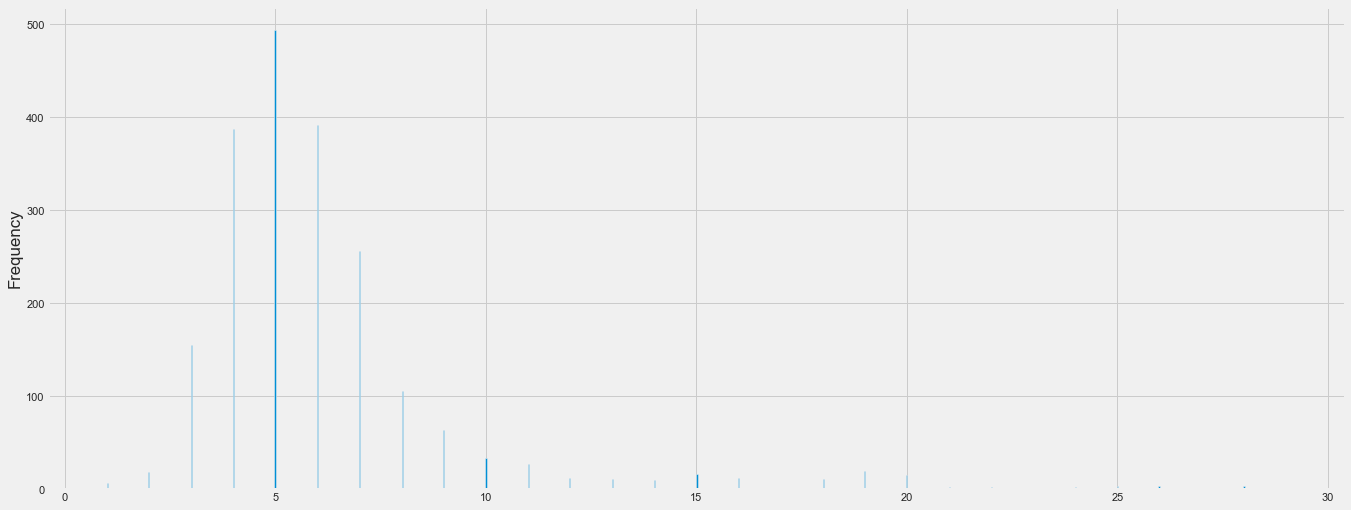

kamar_tidur


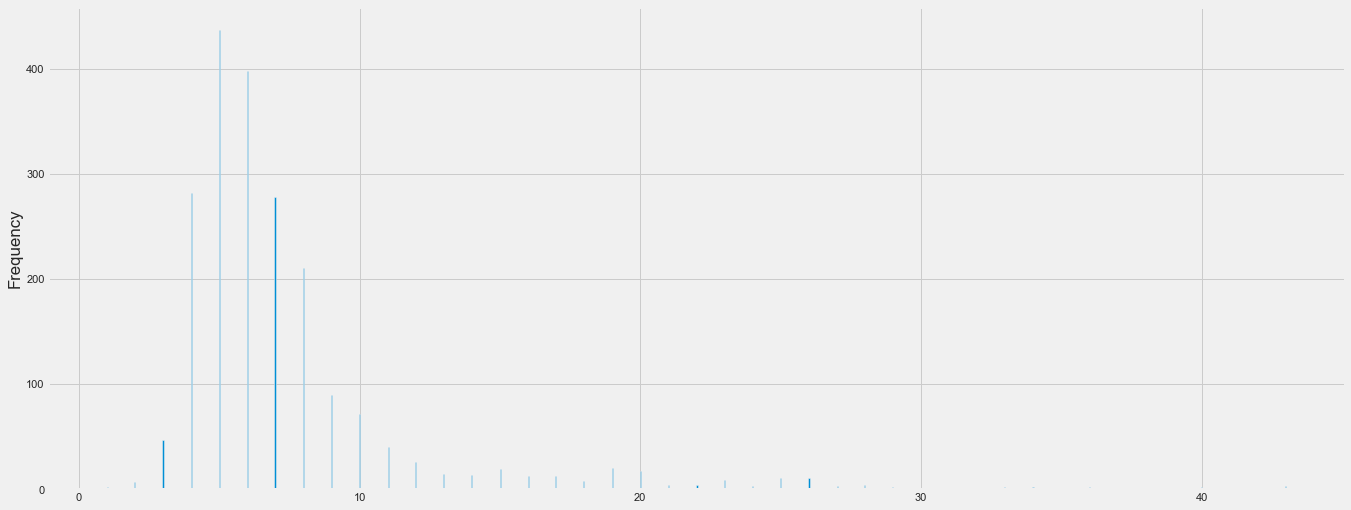

luas_bangunan


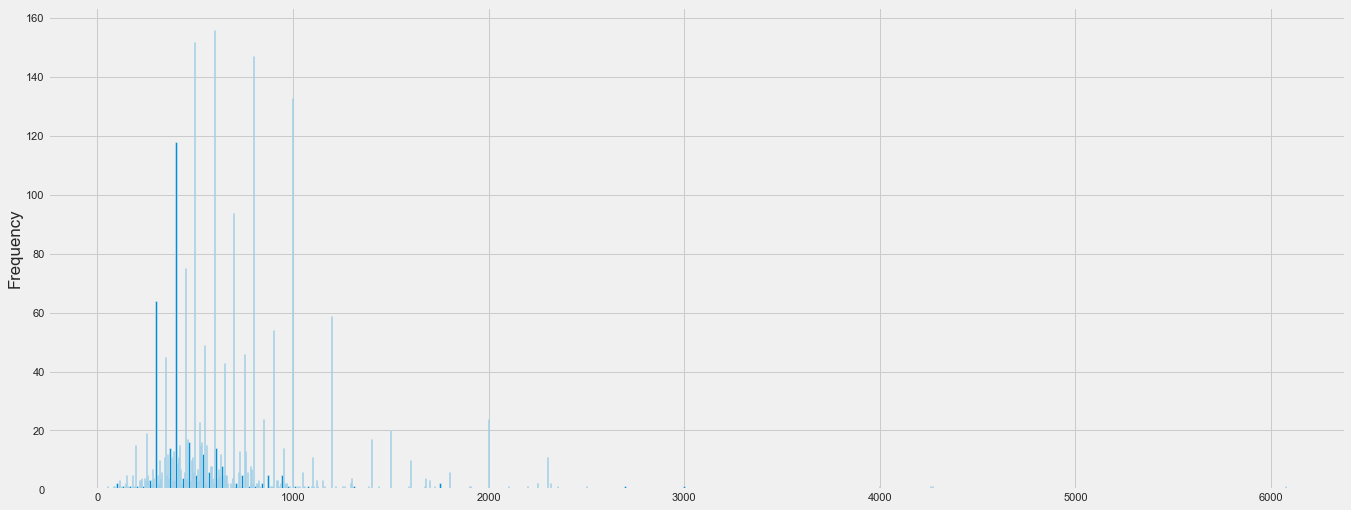

luas_tanah


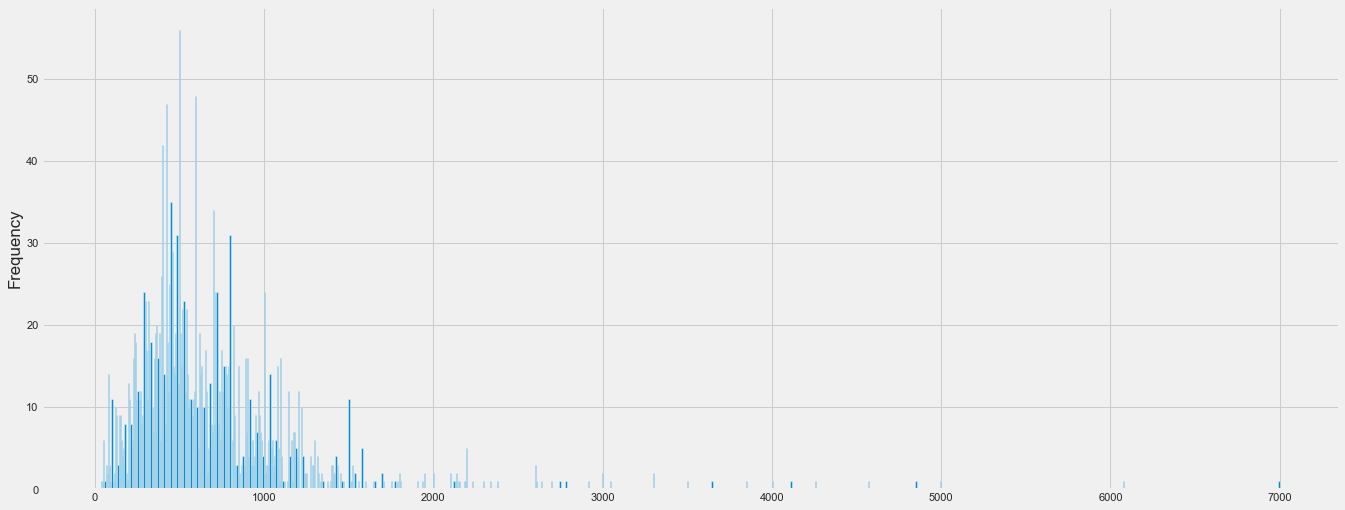

harga


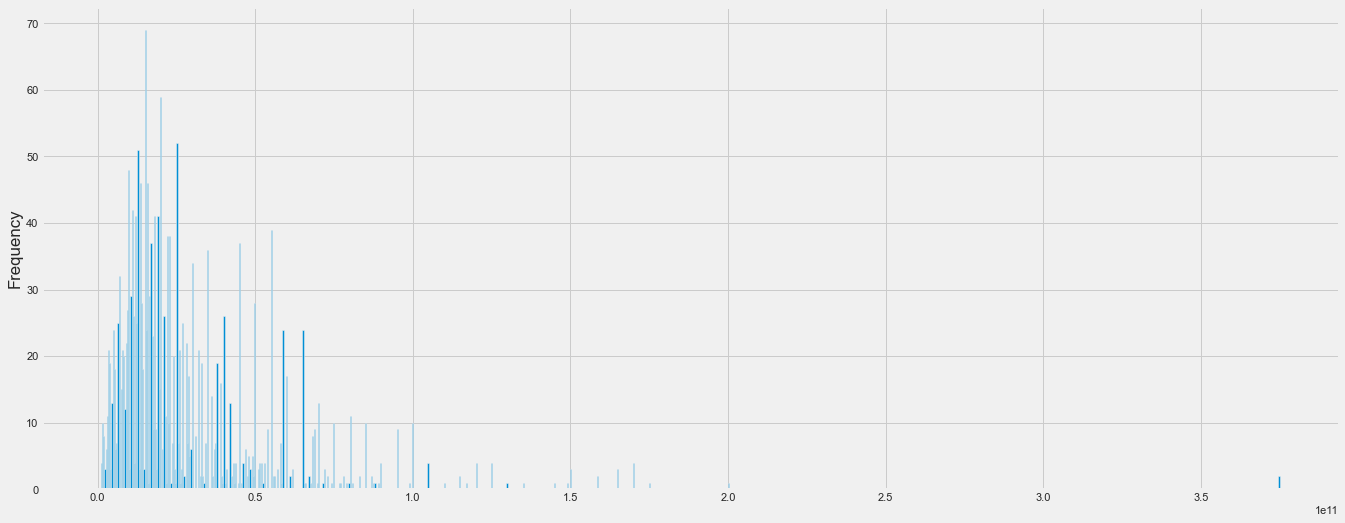

jumlah_lantai


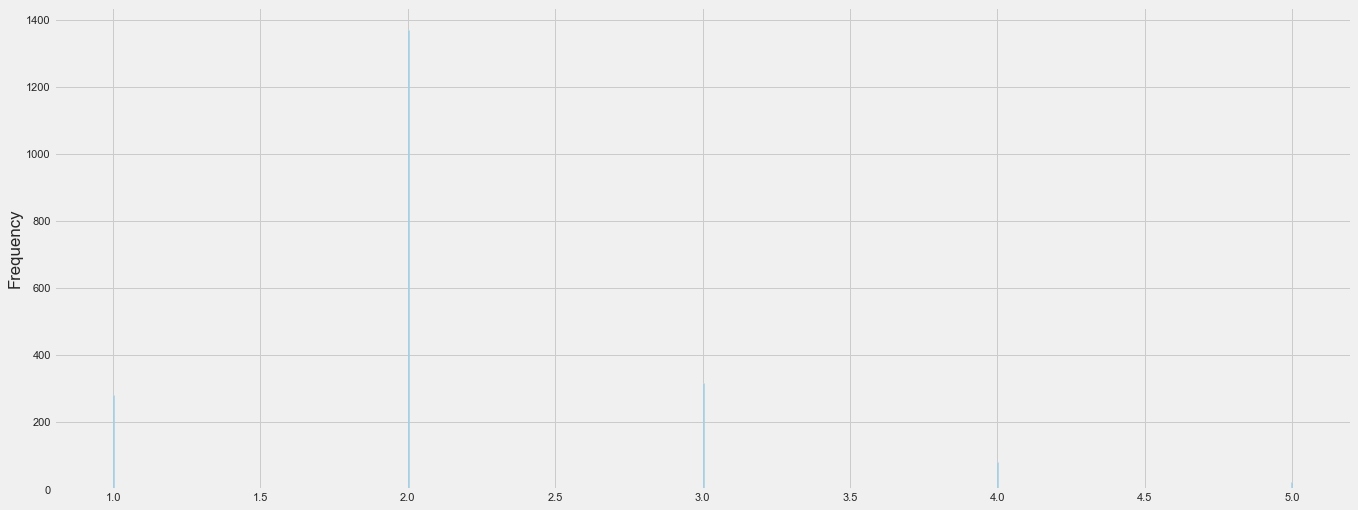

listrik


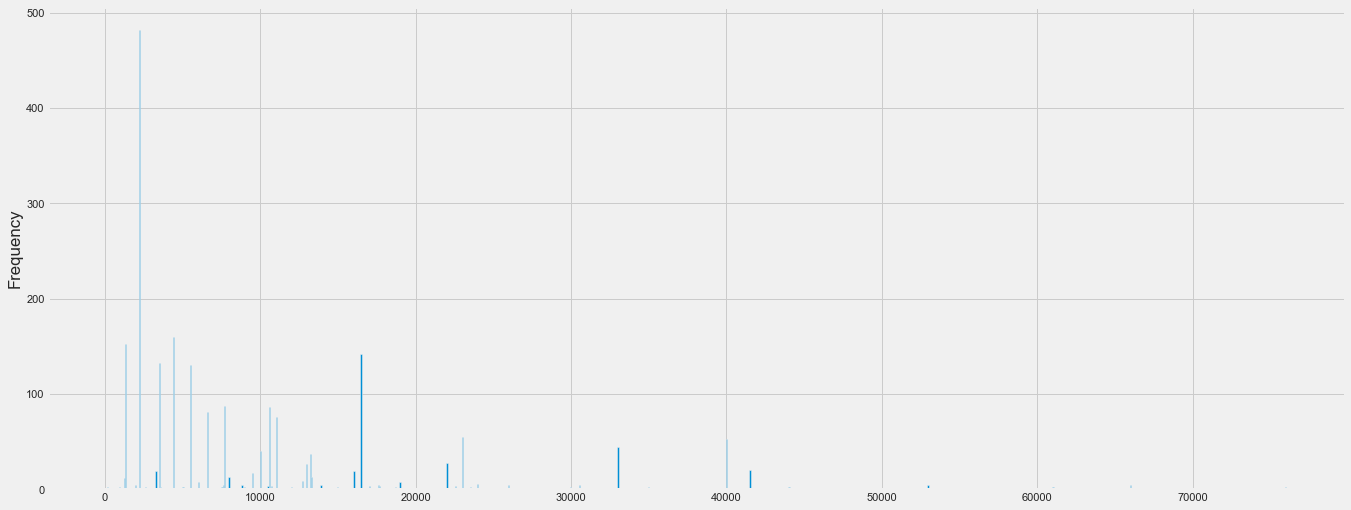

In [49]:
for i in num:
    print(i)
    df_2c[df_2c['Clusters']==0][i].plot.hist(bins = 1000)
    plt.show()

kecamatan


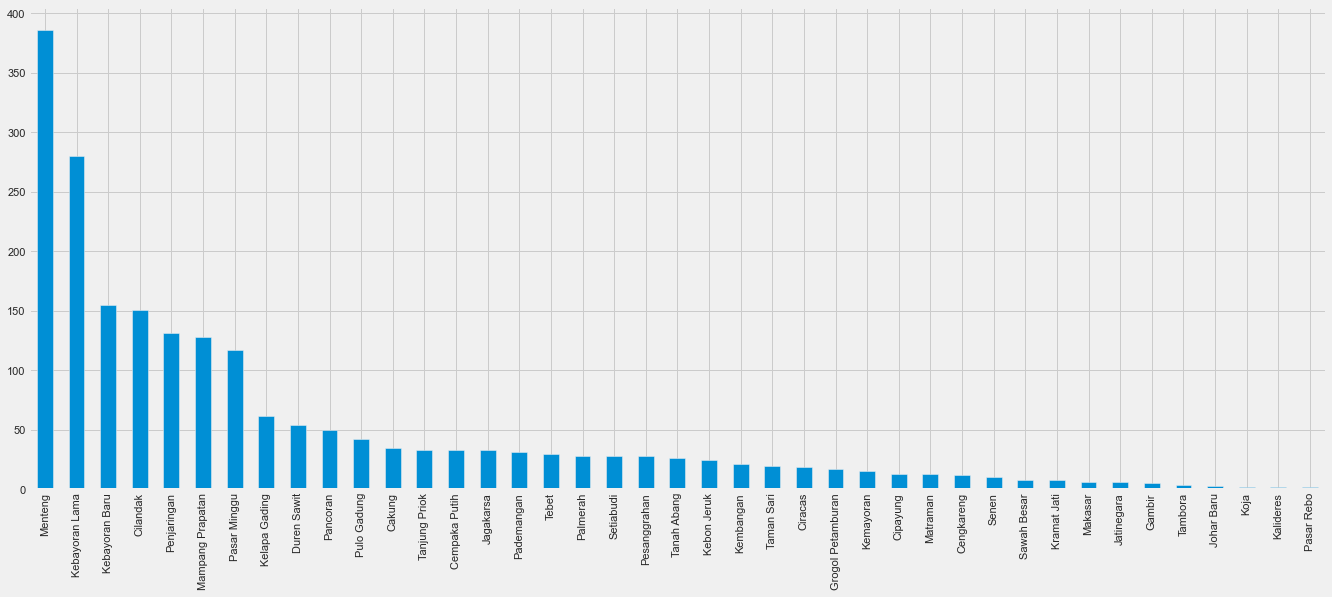

garasi


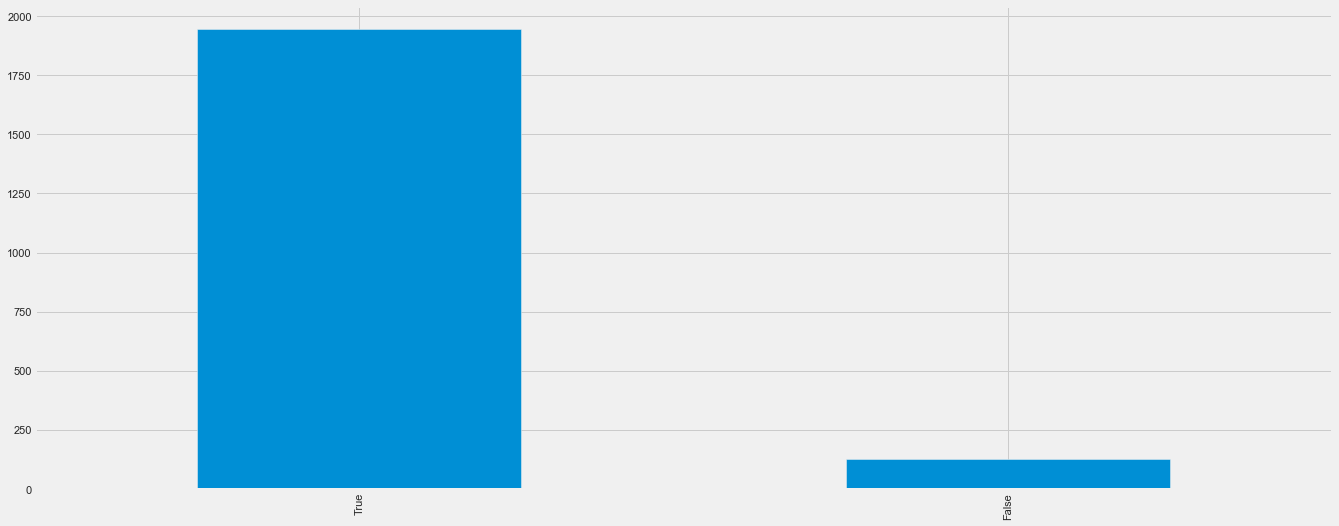

kolam_renang


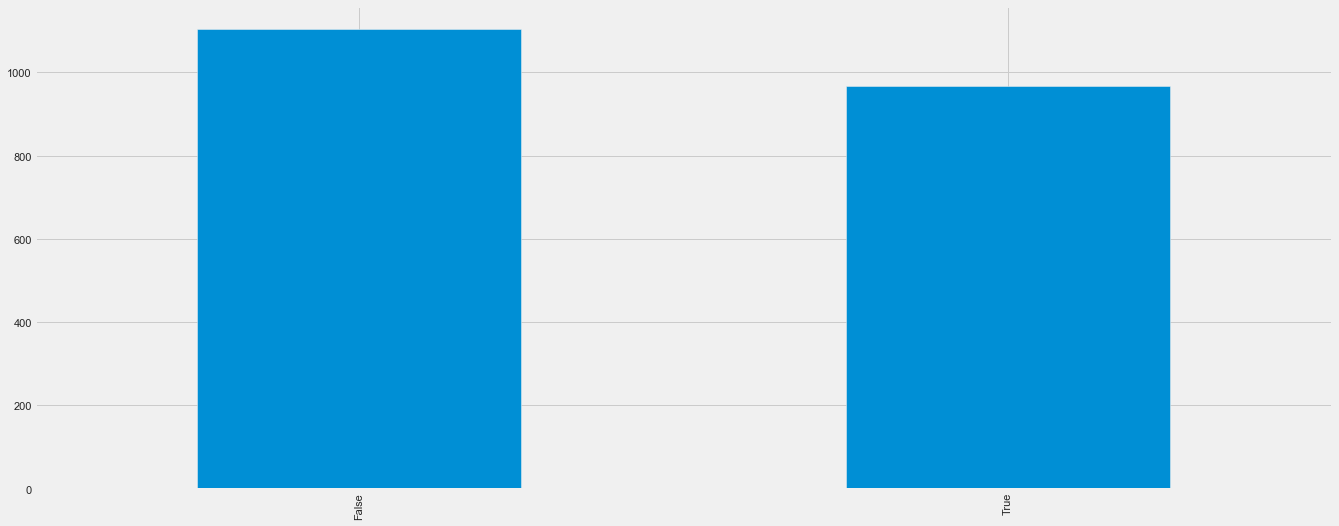

taman


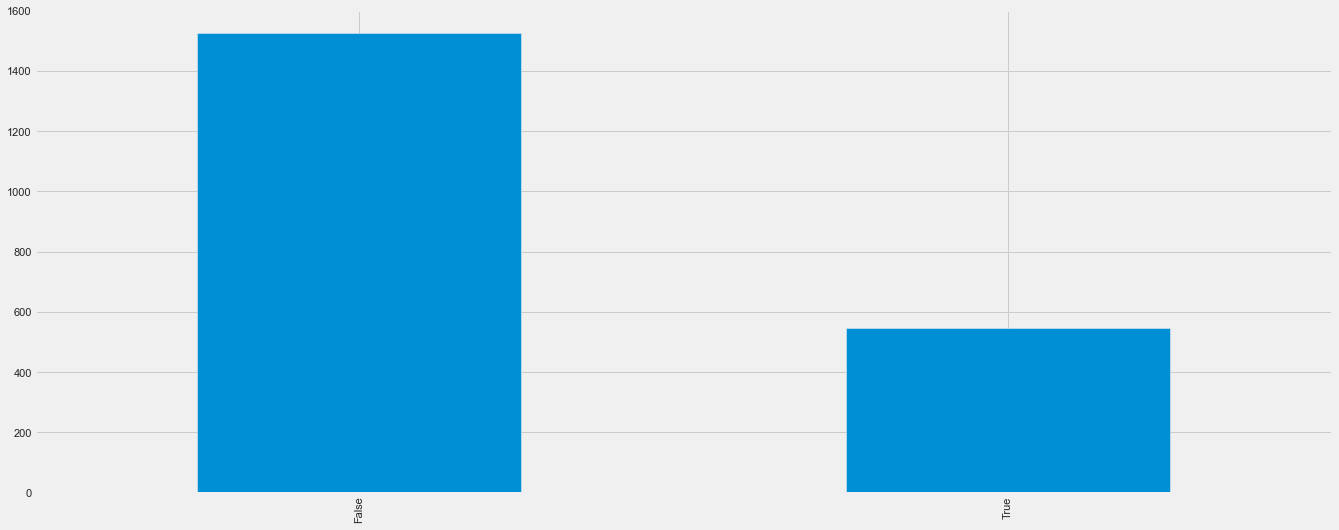

gym


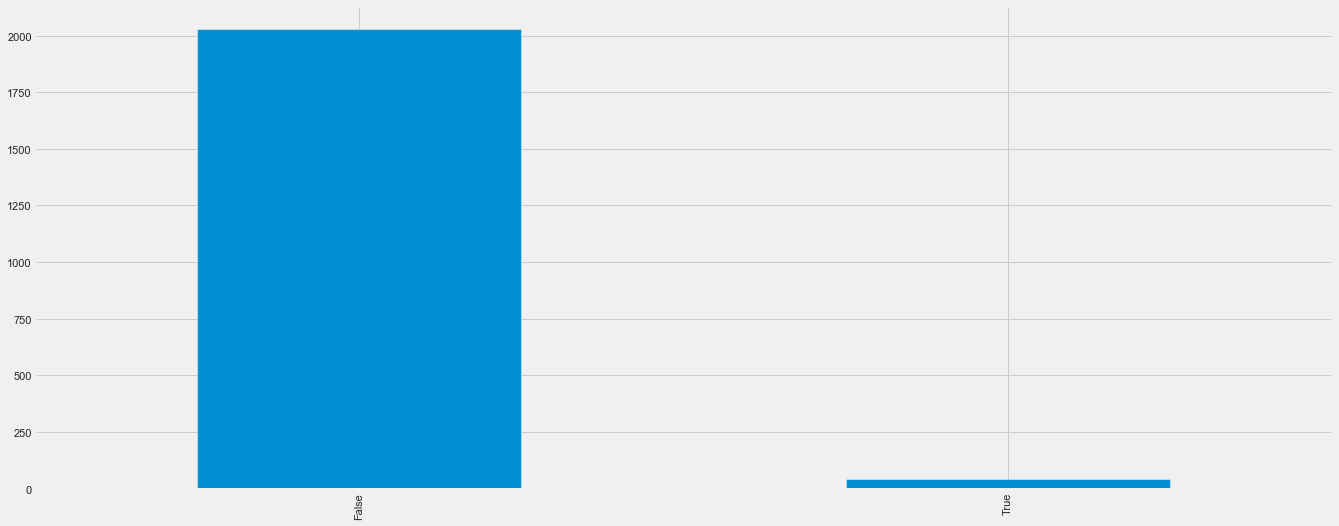

In [50]:
for i in cat:
    print(i)
    df_2c[df_2c['Clusters']==0][i].value_counts().plot.bar()
    plt.show()

# Cluster 1

kamar_mandi


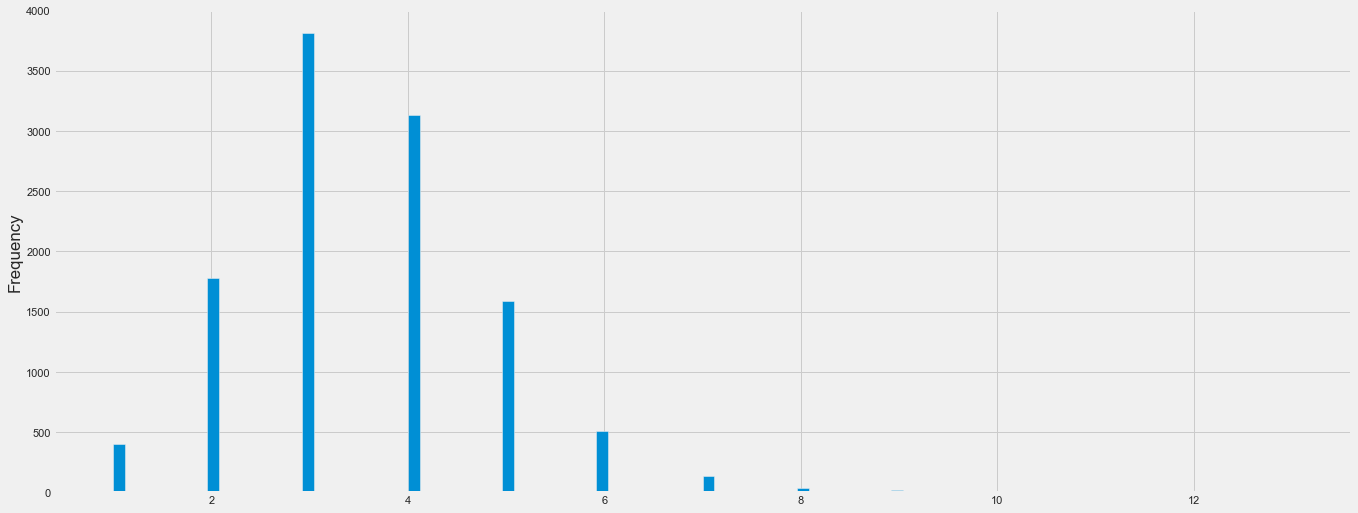

kamar_tidur


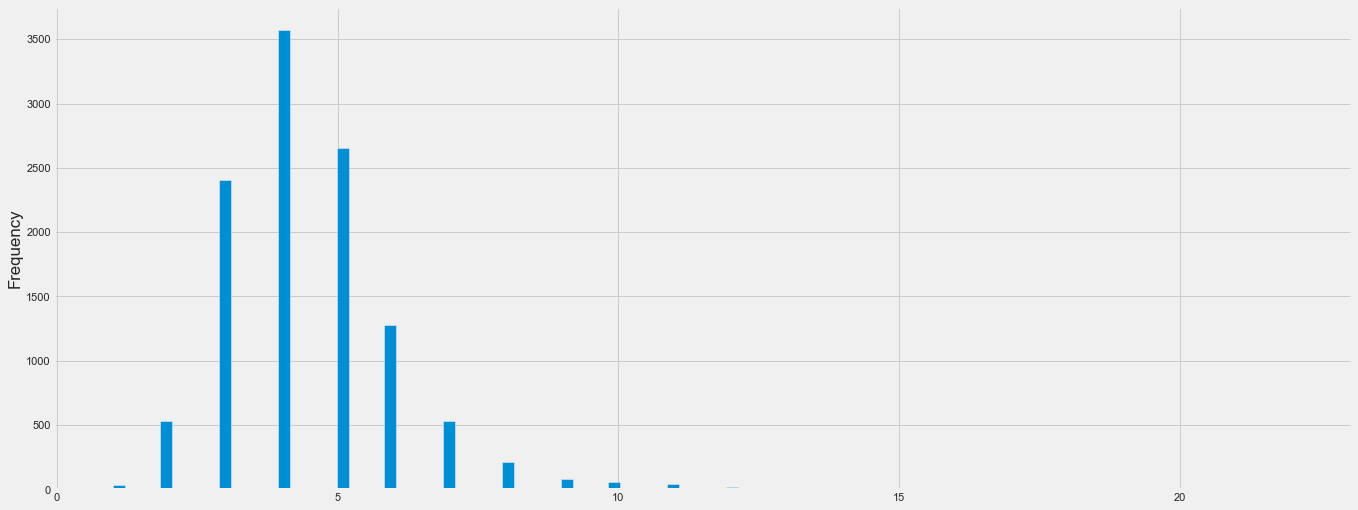

luas_bangunan


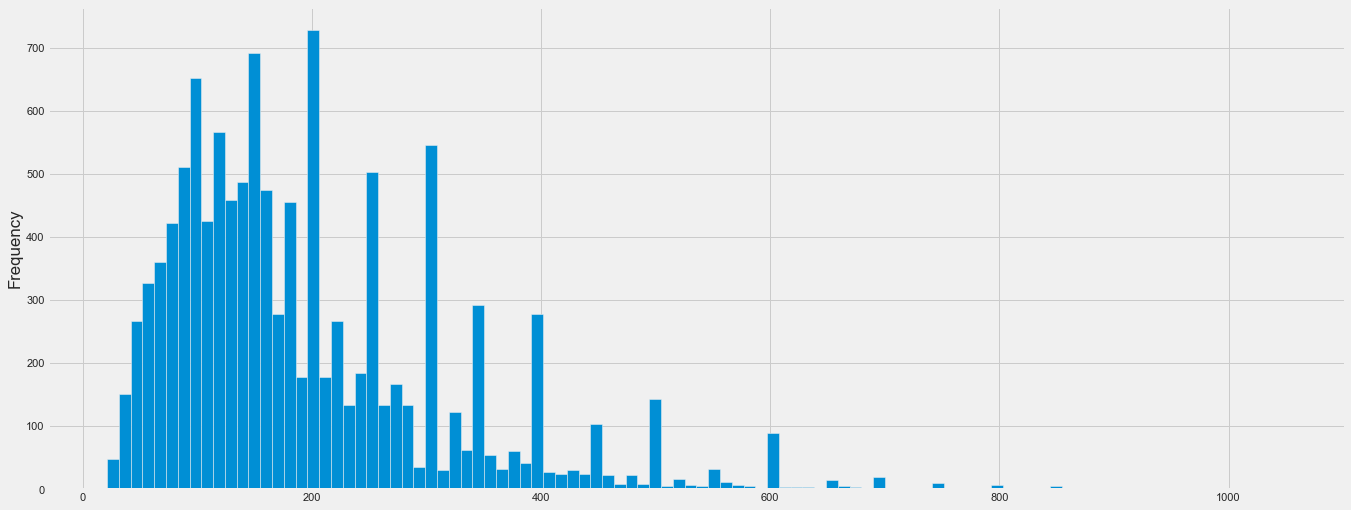

luas_tanah


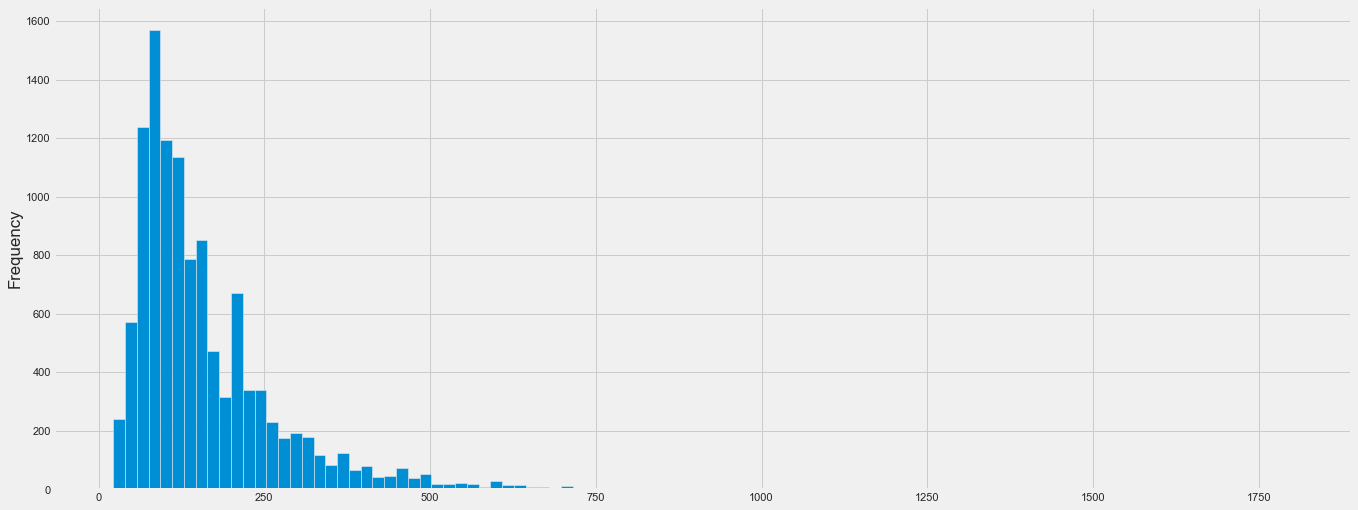

harga


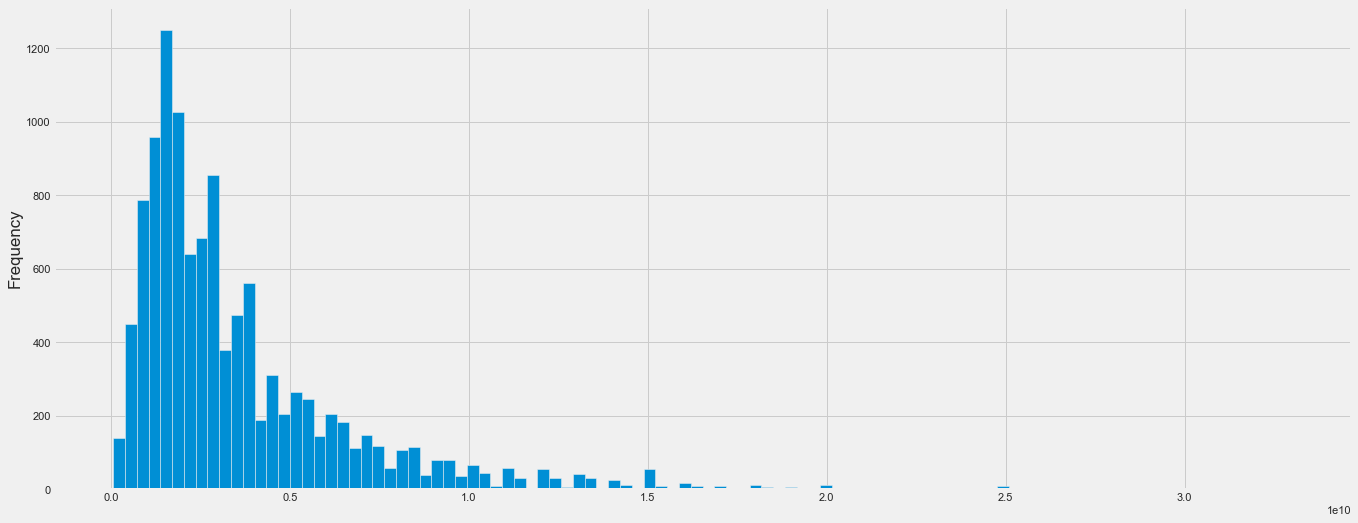

jumlah_lantai


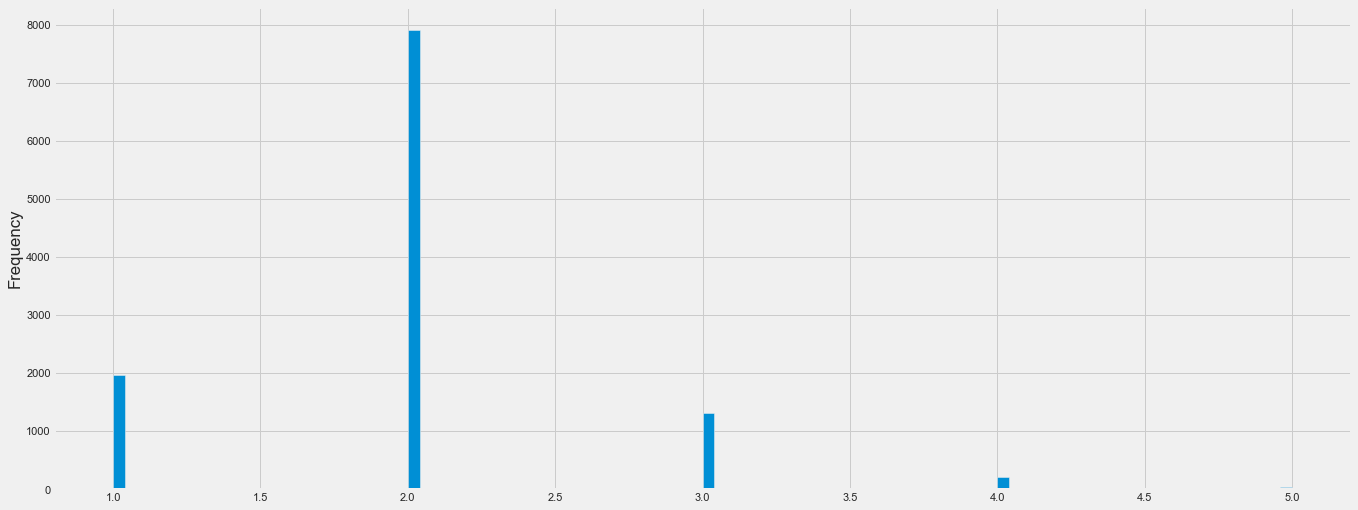

listrik


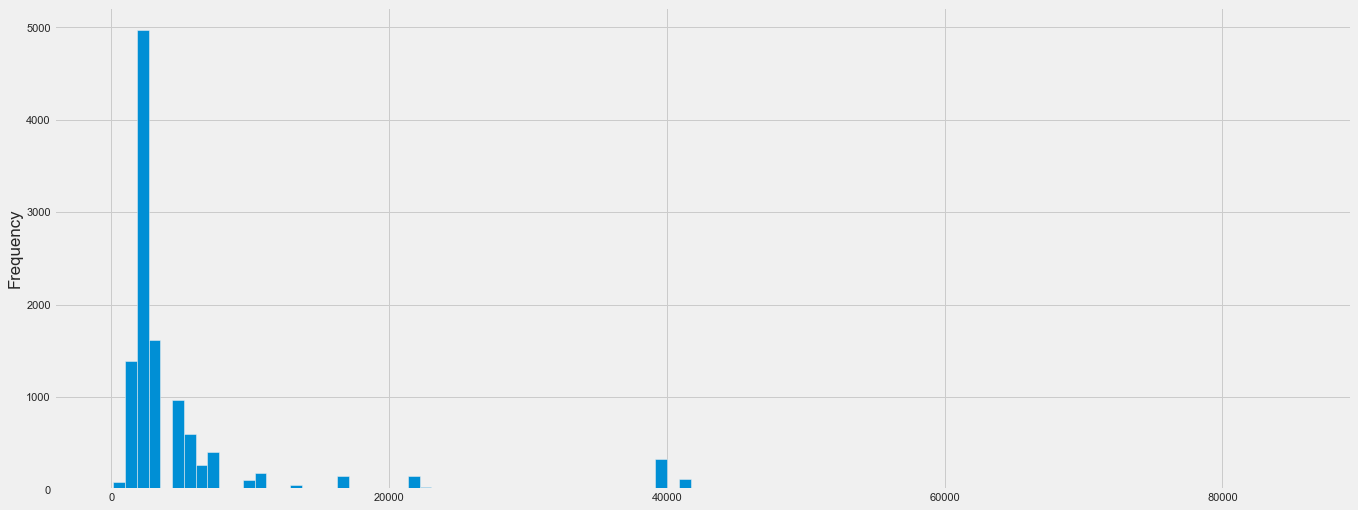

In [51]:
for i in num:
    print(i)
    df_2c[df_2c['Clusters']==1][i].plot.hist(bins = 100)
    plt.show()

kecamatan


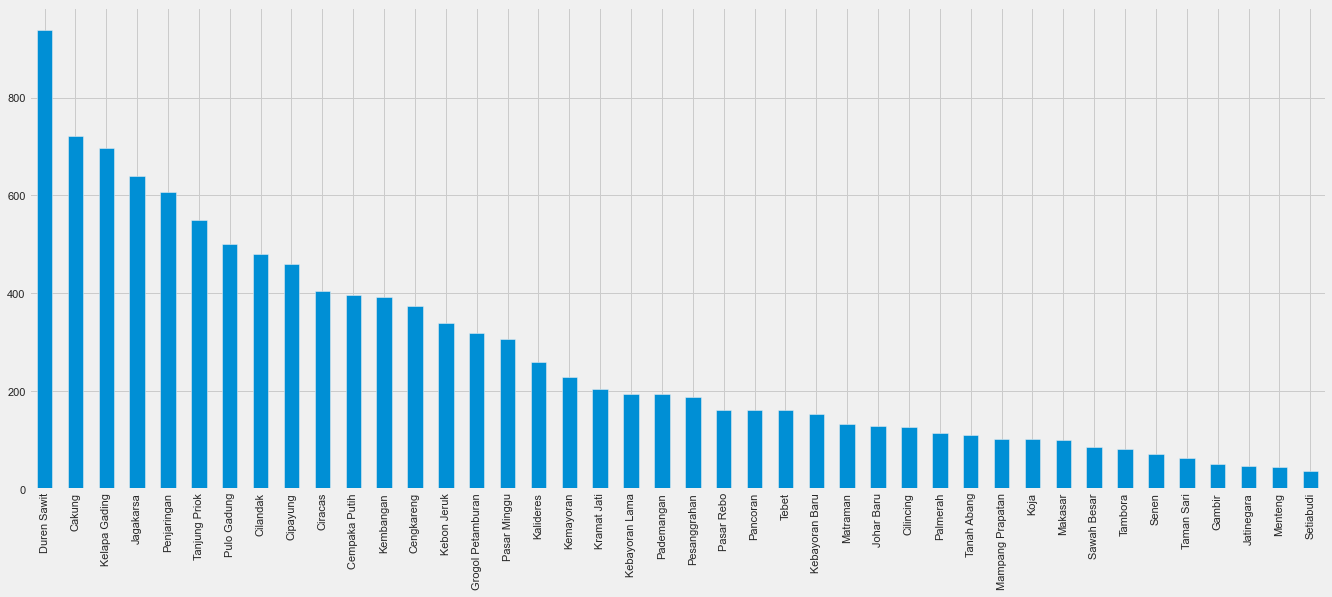

garasi


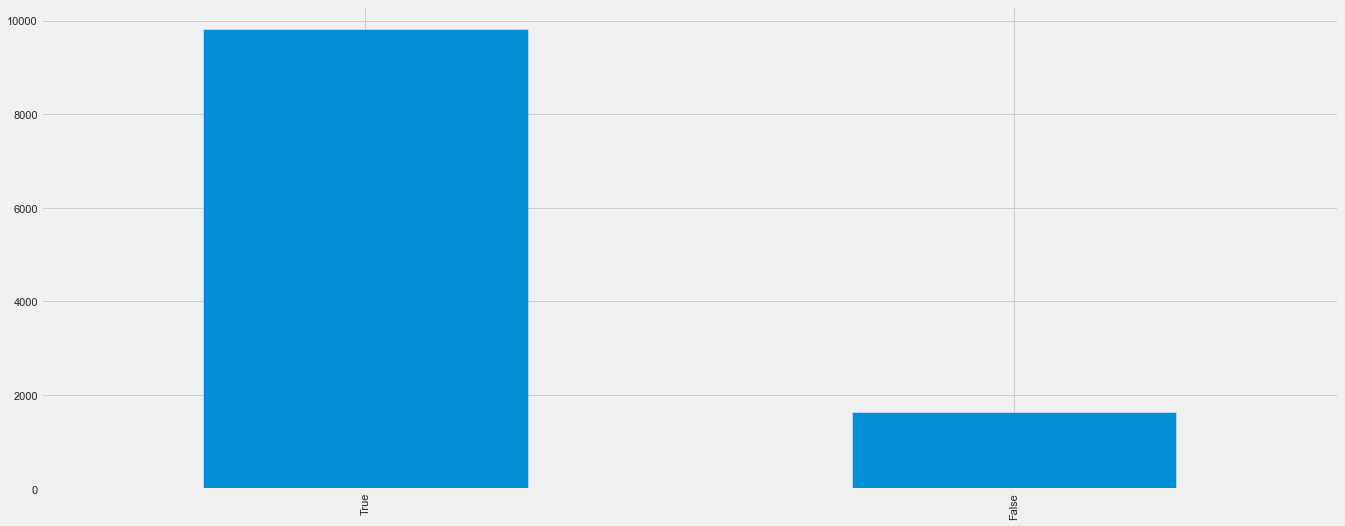

kolam_renang


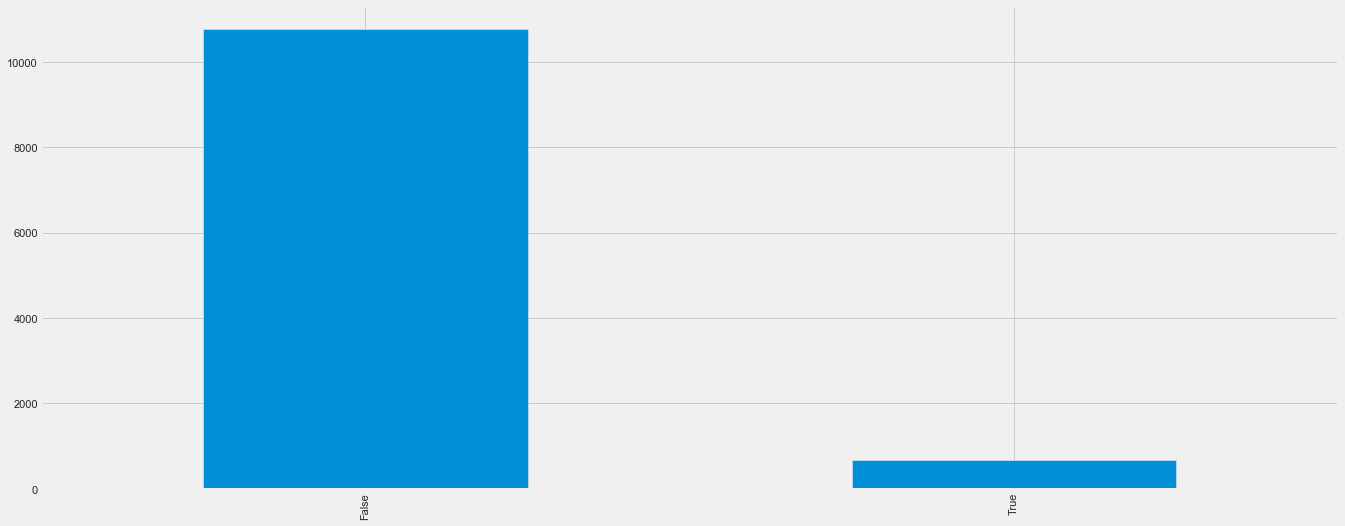

taman


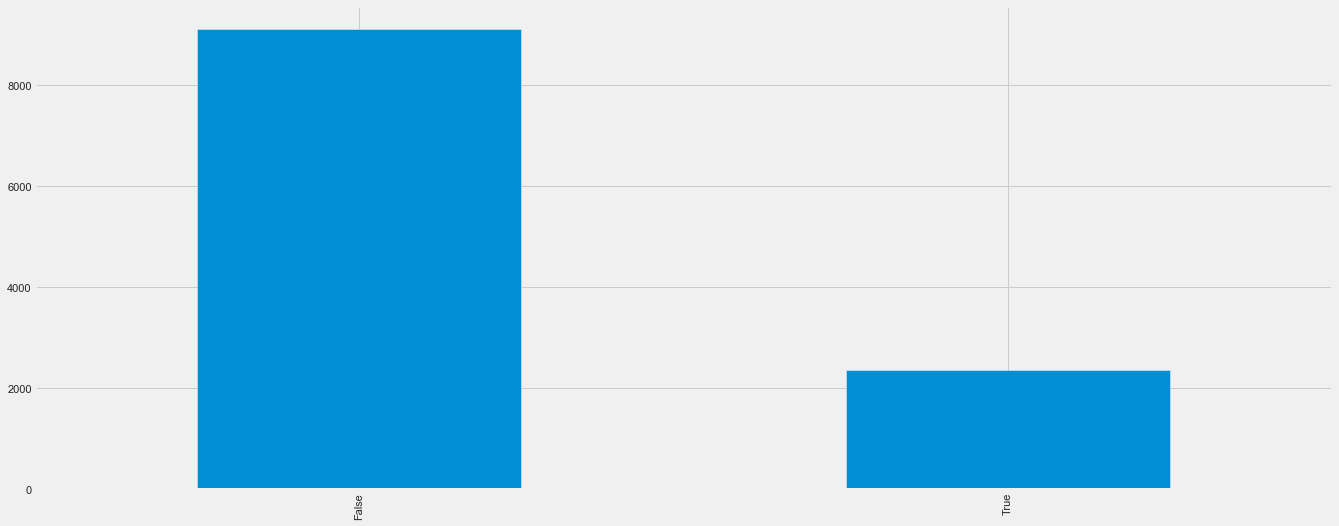

gym


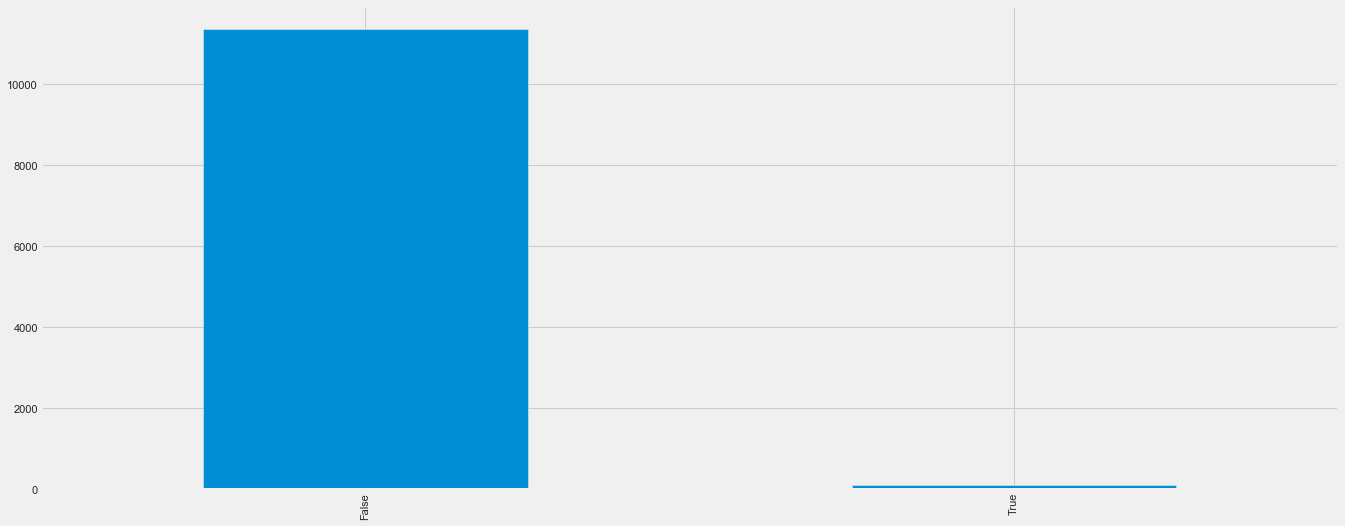

In [52]:
for i in cat:
    print(i)
    df_2c[df_2c['Clusters']==1][i].value_counts().plot.bar()
    plt.show()

In [53]:
df_2c['kecamatan'] = encoding.transform(df_2c[['kecamatan']])

In [54]:
df_2c.corr()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,kecamatan,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik,Clusters
kamar_mandi,1.000000,0.766901,0.422246,0.289523,0.263958,0.143626,0.174917,0.137098,-0.008437,0.020703,0.178948,0.122502,-0.475587
kamar_tidur,0.766901,1.000000,0.330197,0.255622,0.200079,0.117369,0.154531,0.062680,-0.045249,0.002555,0.119028,0.078660,-0.408485
luas_bangunan,0.422246,0.330197,1.000000,0.708488,0.697491,0.373947,0.083872,0.323422,0.040855,0.036121,0.148285,0.215437,-0.673456
luas_tanah,0.289523,0.255622,0.708488,1.000000,0.644815,0.322764,0.065768,0.303317,0.060521,0.022087,-0.023350,0.150235,-0.630929
harga,0.263958,0.200079,0.697491,0.644815,1.000000,0.620079,0.063437,0.284172,0.032984,0.051423,0.051010,0.204835,-0.627650
kecamatan,0.143626,0.117369,0.373947,0.322764,0.620079,1.000000,0.056550,0.193645,0.002676,0.041583,0.029873,0.098219,-0.506984
garasi,0.174917,0.154531,0.083872,0.065768,0.063437,0.056550,1.000000,0.077109,-0.040760,0.015504,0.037433,0.086018,-0.087345
kolam_renang,0.137098,0.062680,0.323422,0.303317,0.284172,0.193645,0.077109,1.000000,0.119891,0.167348,0.038396,0.063021,-0.449604
taman,-0.008437,-0.045249,0.040855,0.060521,0.032984,0.002676,-0.040760,0.119891,1.000000,0.083571,-0.018444,-0.033713,-0.052042
gym,0.020703,0.002555,0.036121,0.022087,0.051423,0.041583,0.015504,0.167348,0.083571,1.000000,0.005401,0.028888,-0.050642


In [55]:
df_2c.corr()['Clusters'][:-1].sort_values(ascending=True)

luas_bangunan   -0.673456
luas_tanah      -0.630929
harga           -0.627650
kecamatan       -0.506984
kamar_mandi     -0.475587
kolam_renang    -0.449604
kamar_tidur     -0.408485
listrik         -0.183659
garasi          -0.087345
jumlah_lantai   -0.077471
taman           -0.052042
gym             -0.050642
Name: Clusters, dtype: float64

<AxesSubplot:>

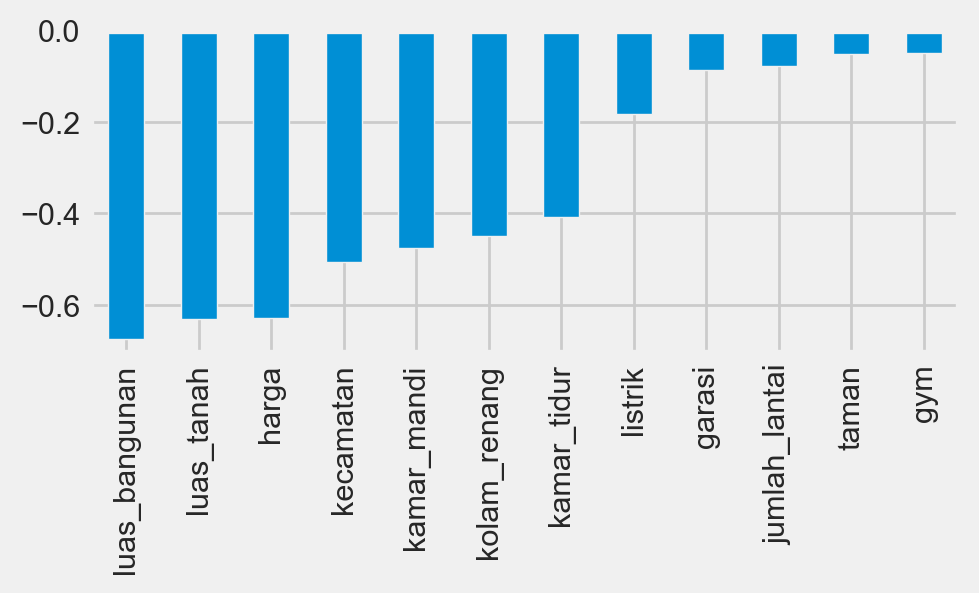

In [56]:
plt.figure(figsize=(5,2), dpi=200)
df_2c.corr()['Clusters'][:-1].sort_values().plot(kind='bar')